In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve, average_precision_score, roc_auc_score

from script import utils, cms
from script.utils import free_mem

from script.datasets import Dataset, FairDataset
from script.cms import get_data_balanced

sns.set()

In [2]:
utils.set_random_seed(42)

Random seed 42 set.


## bbH

In [3]:
VARIABLES = ["dimuon_deltar", "dimuon_deltaphi", "dimuon_deltaeta", "met_pt", 
             "deltar_bjet1_dimuon", "deltapt_bjet1_dimuon", "deltaeta_bjet1_dimuon", 
             "bjet_1_pt", "bjet_1_eta", "deltaphi_bjet1_dimuon",
             "ljet_1_pt", "ljet_1_eta", "bjet_n", "ljet_n"]

In [4]:
data = Dataset()
data.load(signal='data/signal_bassociated_inclusive.csv', 
          bkg='data/background_inclusive.csv', feature_columns=VARIABLES)

[signal] loading...
[background] loading...
[Dataset] loaded.


In [5]:
train, valid, test = cms.data.get_data_balanced(data, features=VARIABLES, case=2, train_batch=1024)

In [5]:
model, checkpoint = utils.get_compiled_pnn(data, save='new/pnn-balanced-inclusive-case_2')

In [7]:
model.fit(x=train, epochs=100, validation_data=valid, verbose=2,
          callbacks=[checkpoint, EarlyStopping(patience=40)])

Epoch 1/100
2337/2337 - 34s - loss: 0.3048 - binary_accuracy: 0.8657 - auc: 0.9388 - precision: 0.8623 - recall: 0.8684 - class-loss: 0.3171 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 2.6079 - weight-norm: 21.3456 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0000e+00 - val_loss: 0.2009 - val_binary_accuracy: 0.9197 - val_auc: 0.9772 - val_precision: 0.8985 - val_recall: 0.9463
Epoch 2/100
2337/2337 - 39s - loss: 0.3031 - binary_accuracy: 0.8739 - auc: 0.9451 - precision: 0.8666 - recall: 0.8821 - class-loss: 0.2981 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 1.5535 - weight-norm: 22.9378 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0000e+00 - val_loss: 0.2081 - val_binary_accuracy: 0.9132 - val_auc: 0.9778 - val_precision: 0.8768 - val_recall: 0.9614
Epoch 3/100
2337/2337 - 48s - loss: 0.2732 - binary_accuracy: 0.8758 - auc: 0.9464 - precision: 0.8677 - recall: 0.8850 - class-loss: 0.2946 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 1.1829 - weight-norm: 24.3870 -

2337/2337 - 46s - loss: 0.3194 - binary_accuracy: 0.8806 - auc: 0.9503 - precision: 0.8707 - recall: 0.8923 - class-loss: 0.2835 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.7290 - weight-norm: 47.4605 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0000e+00 - val_loss: 0.2011 - val_binary_accuracy: 0.9173 - val_auc: 0.9787 - val_precision: 0.8882 - val_recall: 0.9550
Epoch 23/100
2337/2337 - 46s - loss: 0.2767 - binary_accuracy: 0.8804 - auc: 0.9504 - precision: 0.8706 - recall: 0.8920 - class-loss: 0.2832 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.7343 - weight-norm: 48.5253 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0000e+00 - val_loss: 0.2070 - val_binary_accuracy: 0.9152 - val_auc: 0.9753 - val_precision: 0.8950 - val_recall: 0.9409
Epoch 24/100
2337/2337 - 48s - loss: 0.2673 - binary_accuracy: 0.8807 - auc: 0.9506 - precision: 0.8705 - recall: 0.8928 - class-loss: 0.2827 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.7197 - weight-norm: 49.6233 - adversari

Epoch 44/100
2337/2337 - 49s - loss: 0.2772 - binary_accuracy: 0.8822 - auc: 0.9519 - precision: 0.8714 - recall: 0.8951 - class-loss: 0.2787 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.6798 - weight-norm: 68.3433 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0000e+00 - val_loss: 0.1991 - val_binary_accuracy: 0.9187 - val_auc: 0.9784 - val_precision: 0.8925 - val_recall: 0.9520
Epoch 45/100
2337/2337 - 46s - loss: 0.2625 - binary_accuracy: 0.8824 - auc: 0.9520 - precision: 0.8715 - recall: 0.8955 - class-loss: 0.2782 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.6841 - weight-norm: 69.1580 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0000e+00 - val_loss: 0.2007 - val_binary_accuracy: 0.9177 - val_auc: 0.9802 - val_precision: 0.8826 - val_recall: 0.9635
Epoch 46/100
2337/2337 - 47s - loss: 0.2948 - binary_accuracy: 0.8822 - auc: 0.9519 - precision: 0.8714 - recall: 0.8951 - class-loss: 0.2785 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.6830 - weight-norm: 69.984

2337/2337 - 40s - loss: 0.2865 - binary_accuracy: 0.8832 - auc: 0.9528 - precision: 0.8715 - recall: 0.8972 - class-loss: 0.2756 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.6987 - weight-norm: 84.6361 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0000e+00 - val_loss: 0.2032 - val_binary_accuracy: 0.9157 - val_auc: 0.9797 - val_precision: 0.8790 - val_recall: 0.9640
Epoch 66/100
2337/2337 - 40s - loss: 0.2706 - binary_accuracy: 0.8834 - auc: 0.9530 - precision: 0.8723 - recall: 0.8967 - class-loss: 0.2751 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.7009 - weight-norm: 85.3031 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0000e+00 - val_loss: 0.1994 - val_binary_accuracy: 0.9186 - val_auc: 0.9792 - val_precision: 0.8881 - val_recall: 0.9578
Epoch 67/100
2337/2337 - 39s - loss: 0.2683 - binary_accuracy: 0.8836 - auc: 0.9531 - precision: 0.8723 - recall: 0.8973 - class-loss: 0.2748 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.7000 - weight-norm: 85.9965 - adversari

Epoch 87/100
2337/2337 - 48s - loss: 0.2493 - binary_accuracy: 0.8842 - auc: 0.9534 - precision: 0.8723 - recall: 0.8984 - class-loss: 0.2737 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.7147 - weight-norm: 99.0051 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0000e+00 - val_loss: 0.2027 - val_binary_accuracy: 0.9157 - val_auc: 0.9794 - val_precision: 0.8797 - val_recall: 0.9631
Epoch 88/100
2337/2337 - 49s - loss: 0.2767 - binary_accuracy: 0.8845 - auc: 0.9537 - precision: 0.8726 - recall: 0.8987 - class-loss: 0.2727 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.7258 - weight-norm: 99.5561 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0000e+00 - val_loss: 0.2011 - val_binary_accuracy: 0.9175 - val_auc: 0.9795 - val_precision: 0.8836 - val_recall: 0.9617
Epoch 89/100
2337/2337 - 51s - loss: 0.2738 - binary_accuracy: 0.8847 - auc: 0.9537 - precision: 0.8731 - recall: 0.8987 - class-loss: 0.2727 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.7229 - weight-norm: 100.14

In [6]:
utils.load_from_checkpoint(model, path='new/pnn-balanced-inclusive-case_2')

Loaded from "weights\new/pnn-balanced-inclusive-case_2\weights-58-0.981"


In [9]:
_ = model.evaluate(x=test, verbose=2)

779/779 - 7s - loss: 0.1983 - binary_accuracy: 0.9179 - auc: 0.9802 - precision: 0.8832 - recall: 0.9632


In [ ]:
for mass in data.unique_signal_mass:
    cms.plot.significance(model, data, mass=mass, category=0, signal='bbH',
            path='plot/pNN/inclusive/bbH/baseline/performance', save=f'significance_{int(mass)}mA')

In [ ]:
for mass in data.unique_signal_mass:
    cms.plot.curves(model, data, mass=mass, category=0, signal='bbH',
                    path='plot/pNN/inclusive/bbH/baseline/performance', save=f'curves_{int(mass)}mA')

In [ ]:
_ = cms.plot.cut(model, data, category=0, signal='bbH', legend='lower right',
                 path='plot/pNN/inclusive/bbH/baseline/performance', save='best-cut_vs_mA')

Evaluate on **category 1**:

In [10]:
sig_cat1 = data.signal[data.signal['bjet_n'] > 0]
bkg_cat1 = data.background[data.background['bjet_n'] > 0]

In [11]:
data_cat1 = Dataset()
data_cat1.load(signal=sig_cat1.reset_index(drop=True), 
               bkg=bkg_cat1.reset_index(drop=True), feature_columns=VARIABLES)

del sig_cat1, bkg_cat1
free_mem()

data_cat1.names_df = pd.DataFrame({'name': data_cat1.background['name']})

[Dataset] loaded.


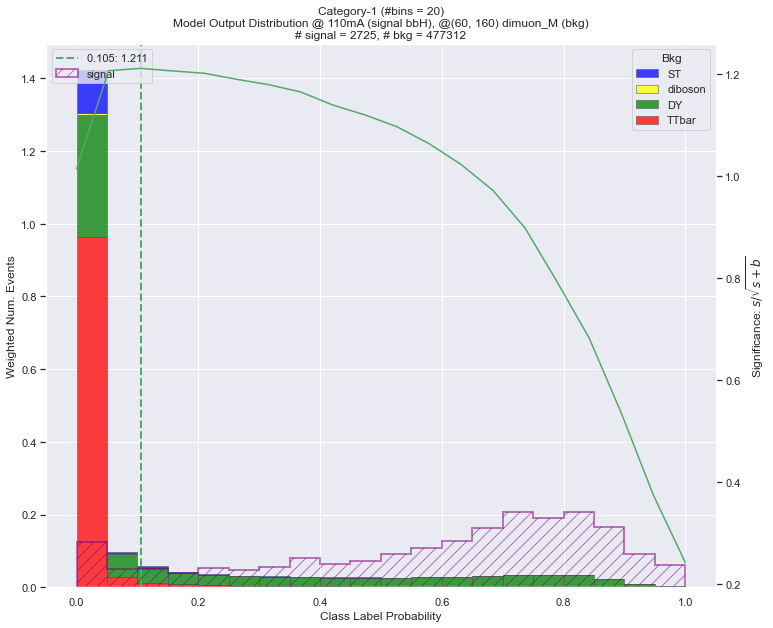

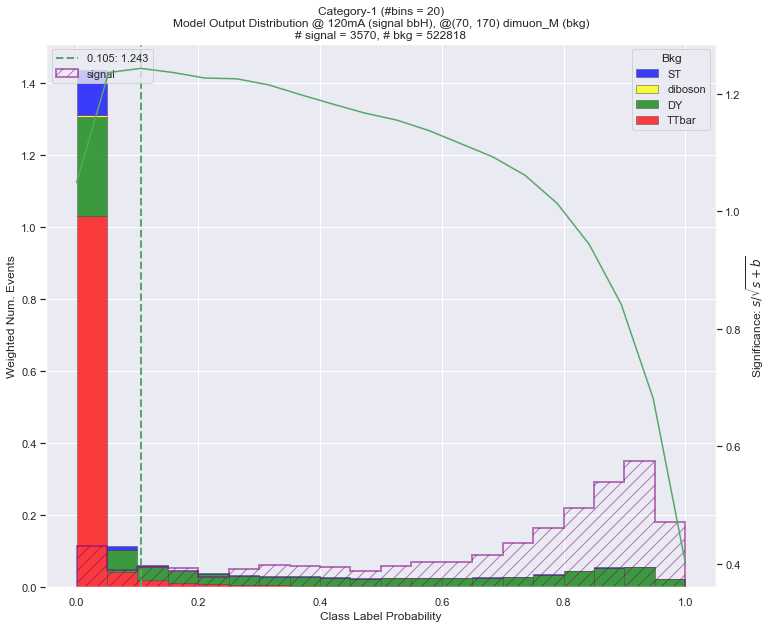

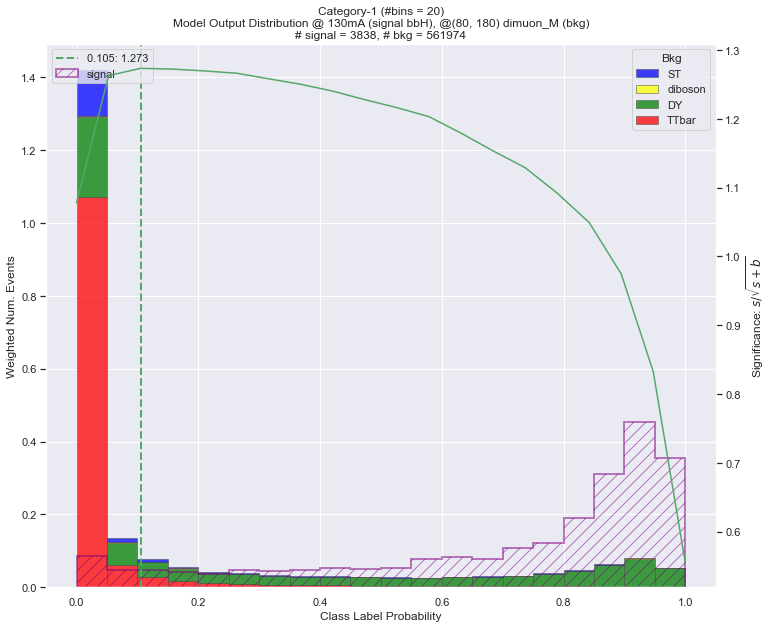

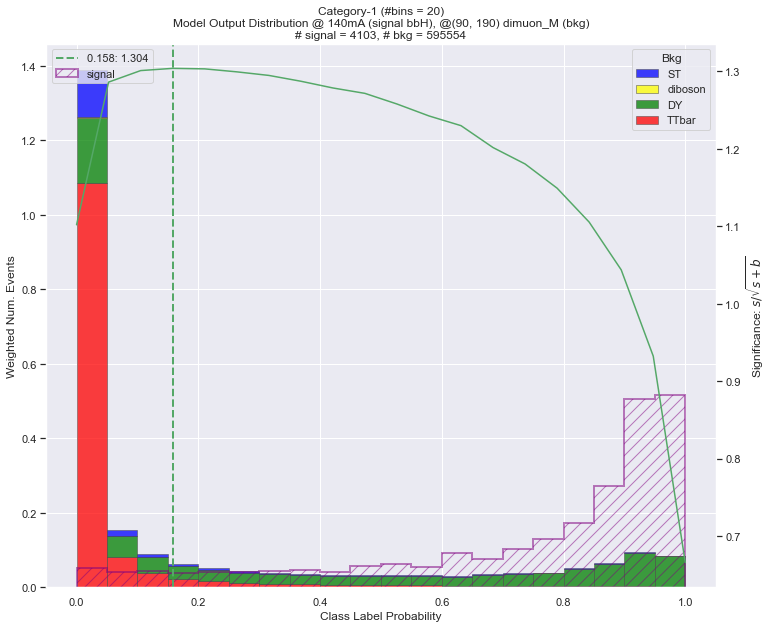

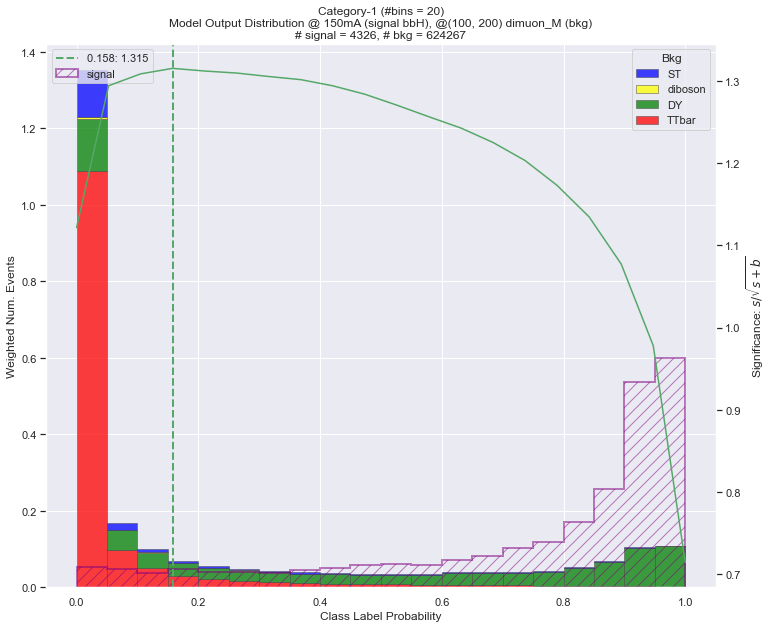

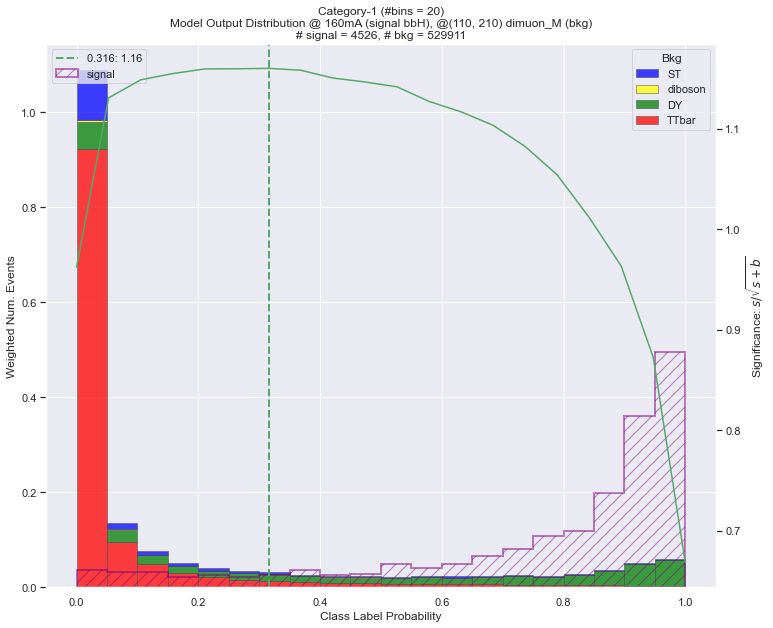

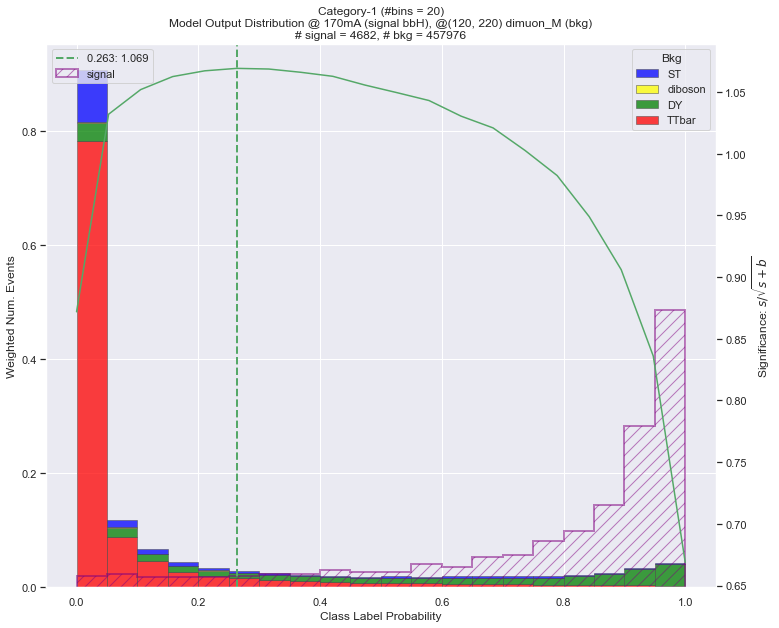

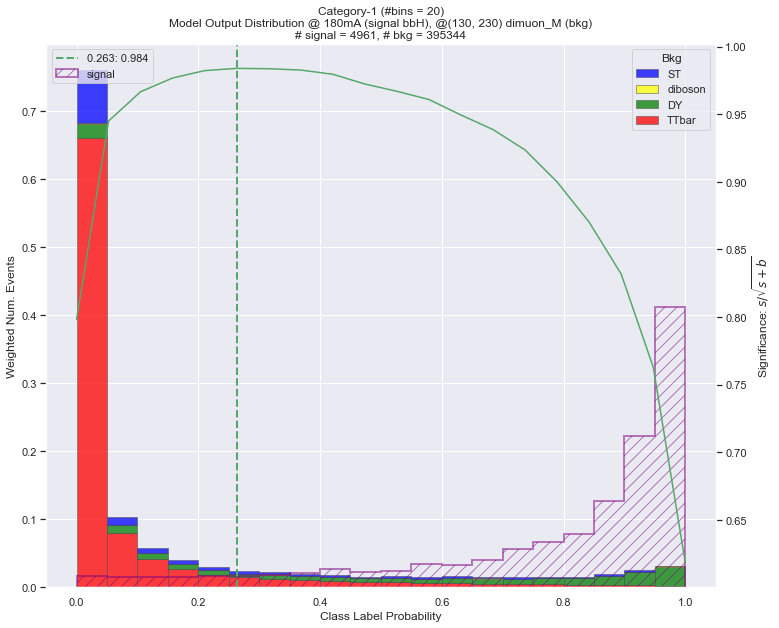

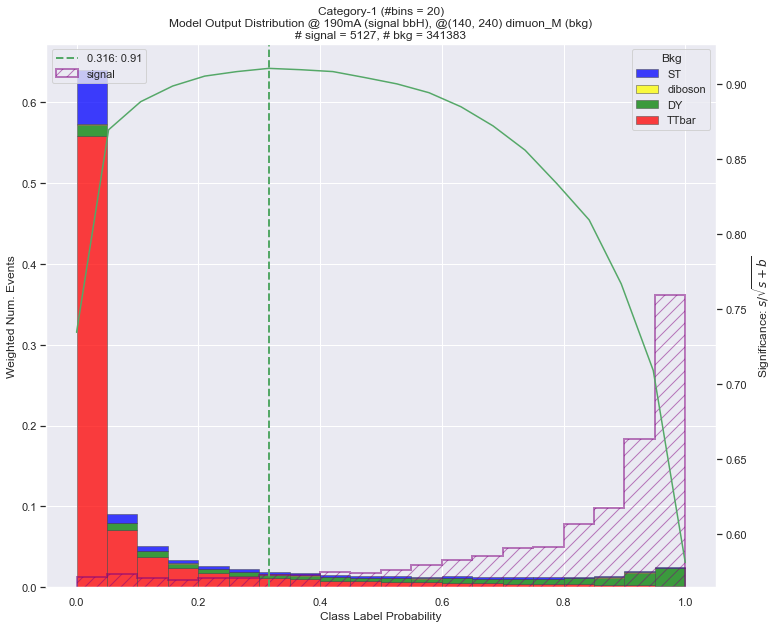

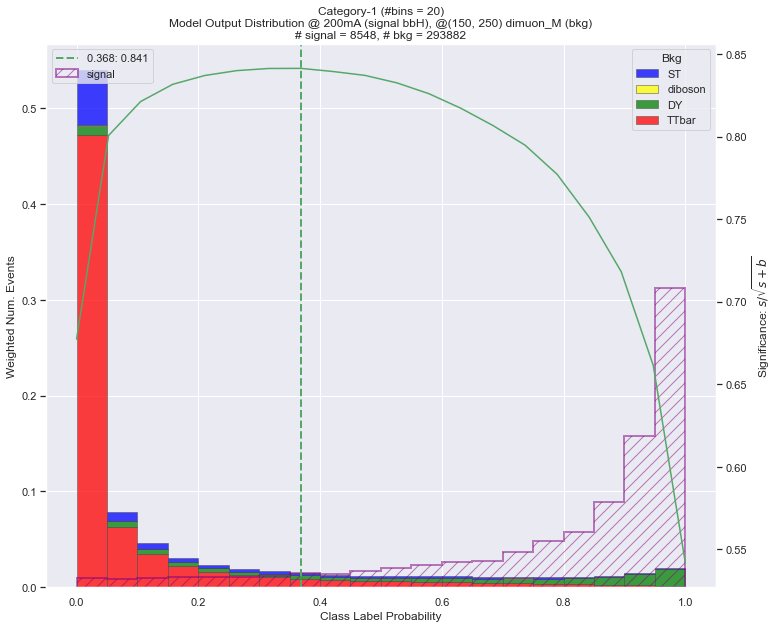

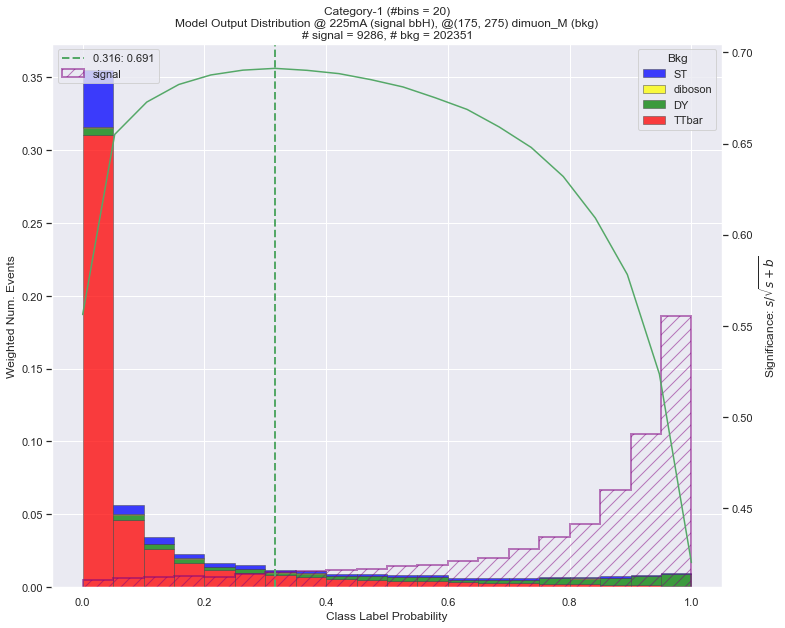

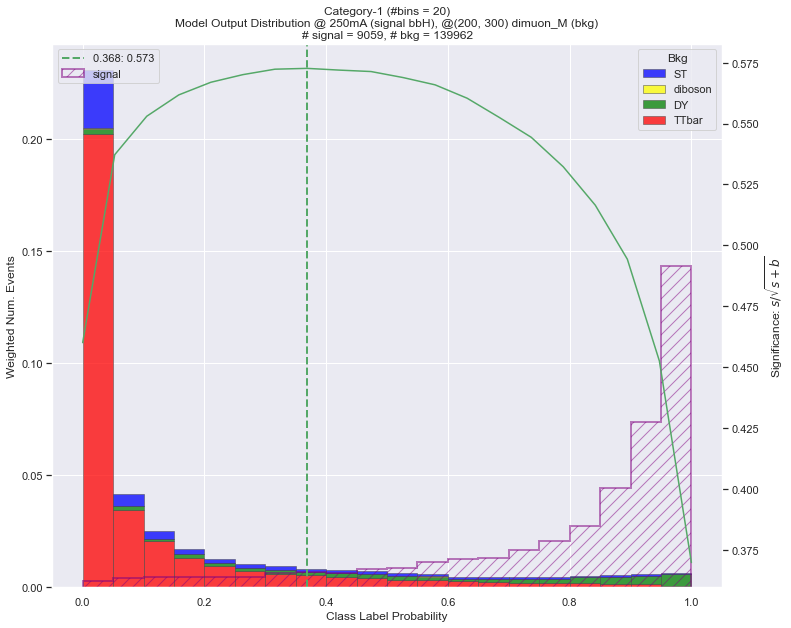

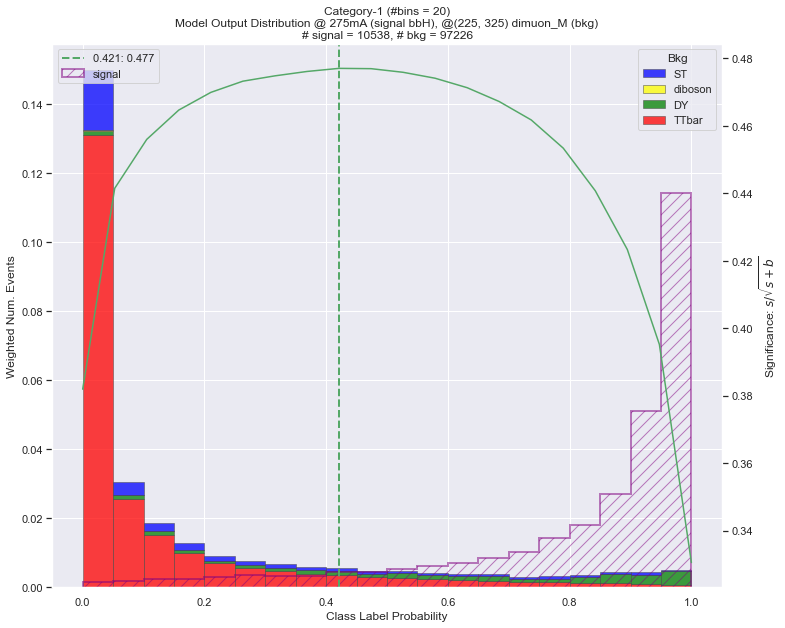

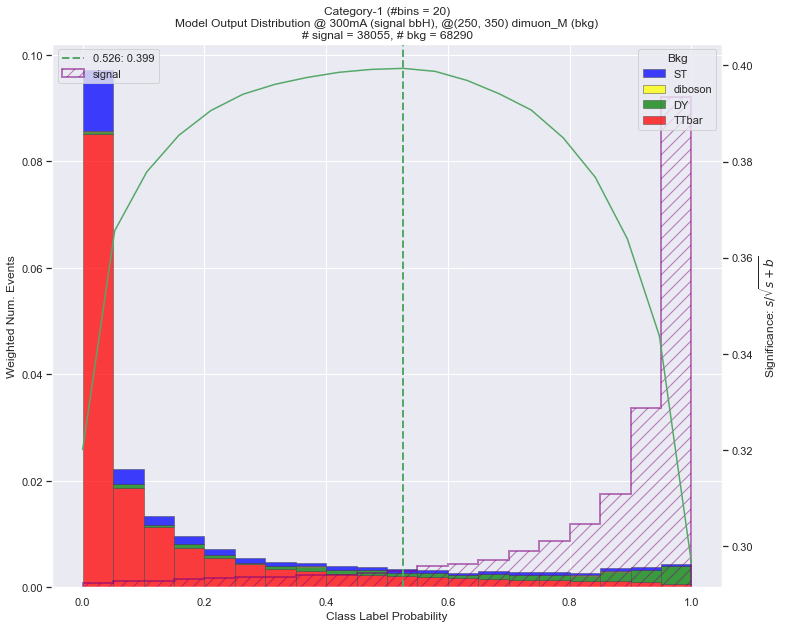

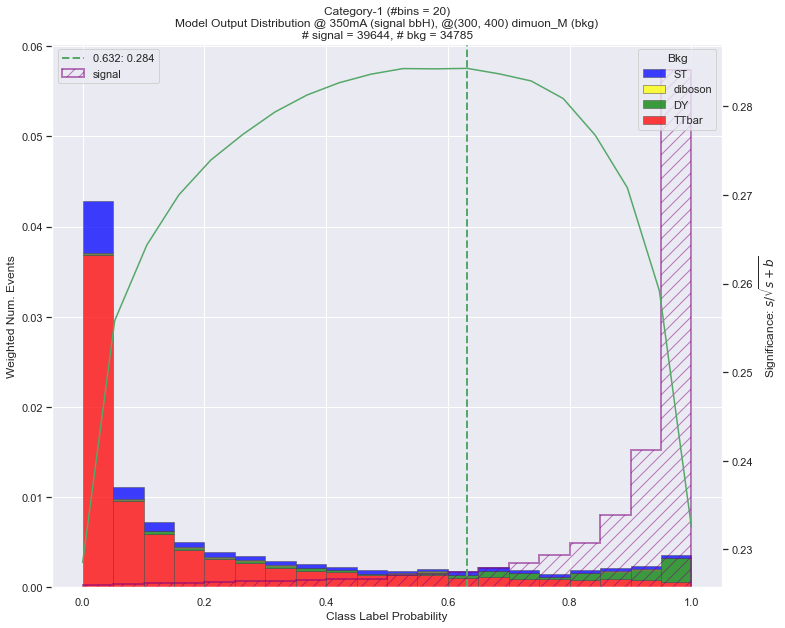

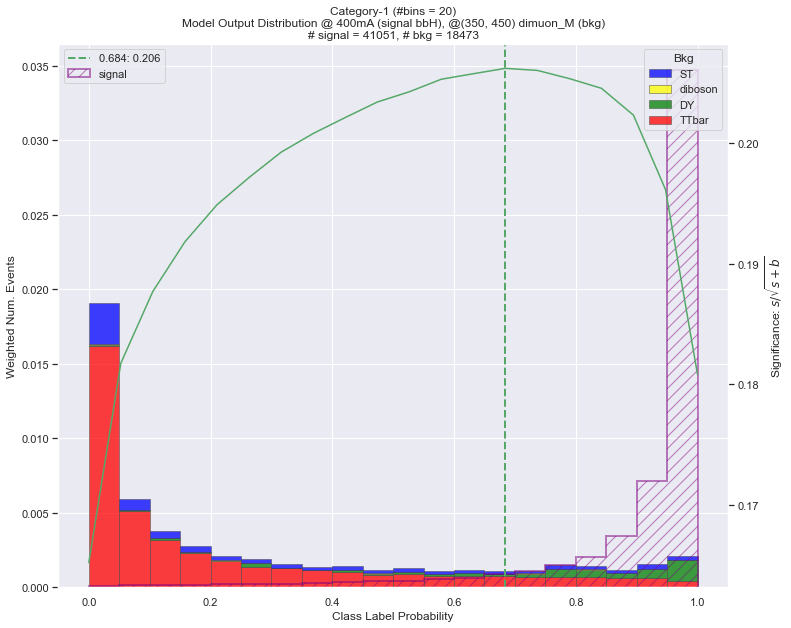

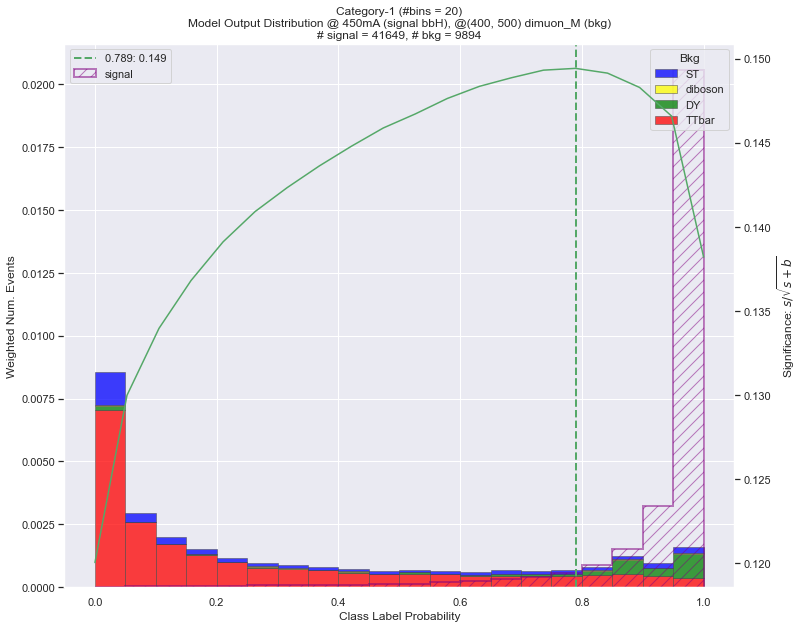

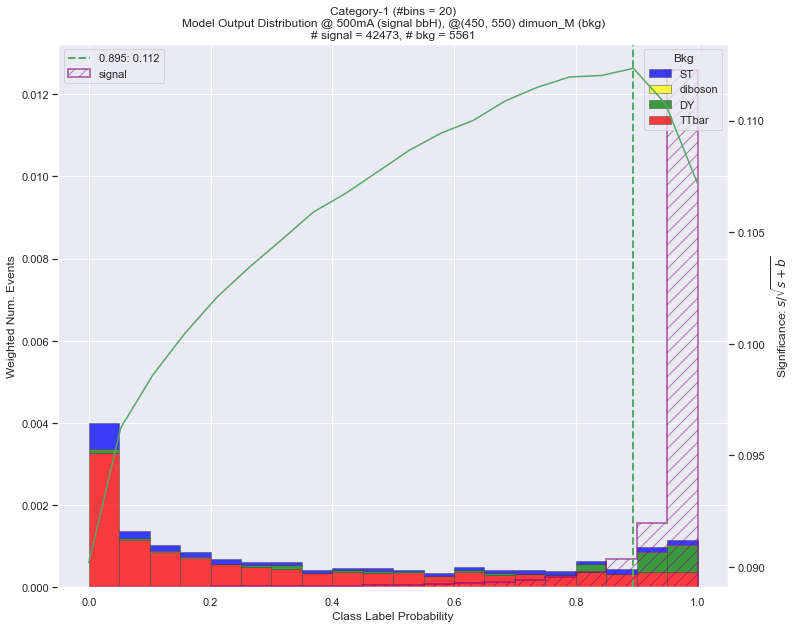

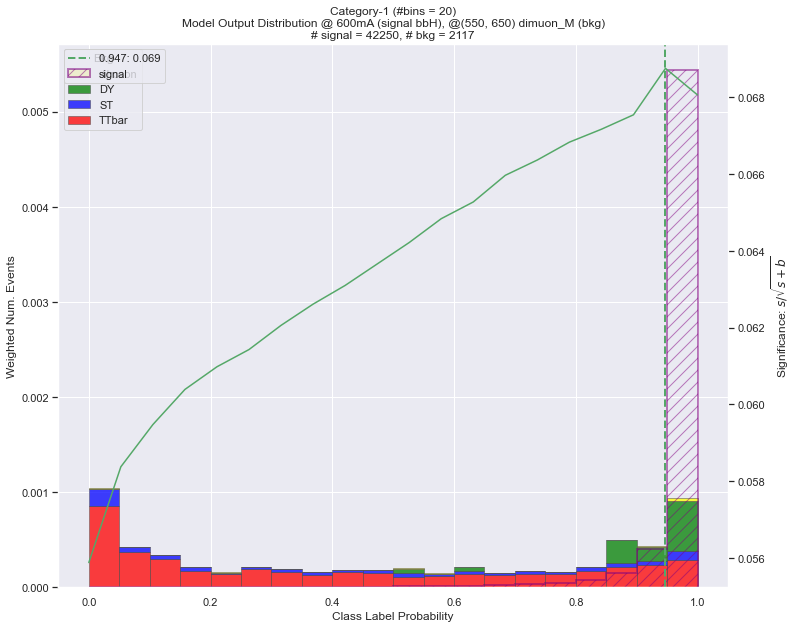

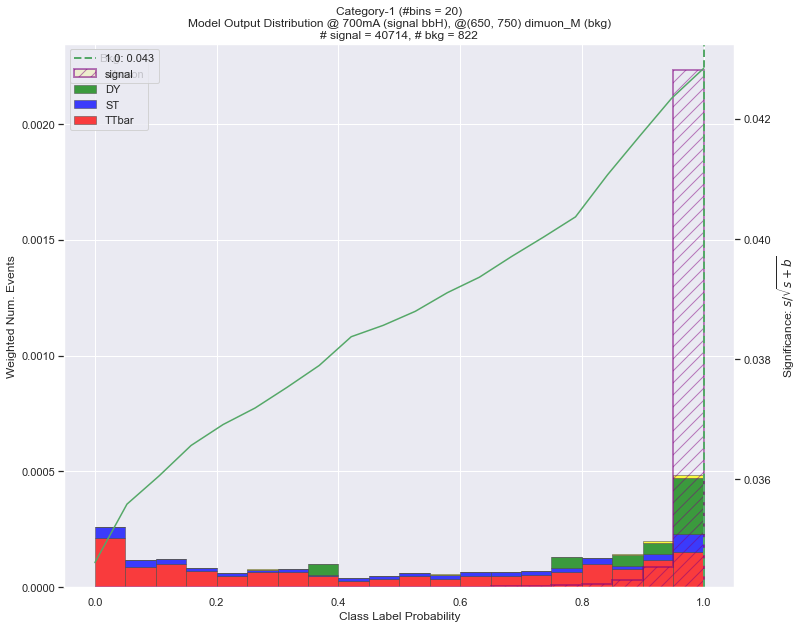

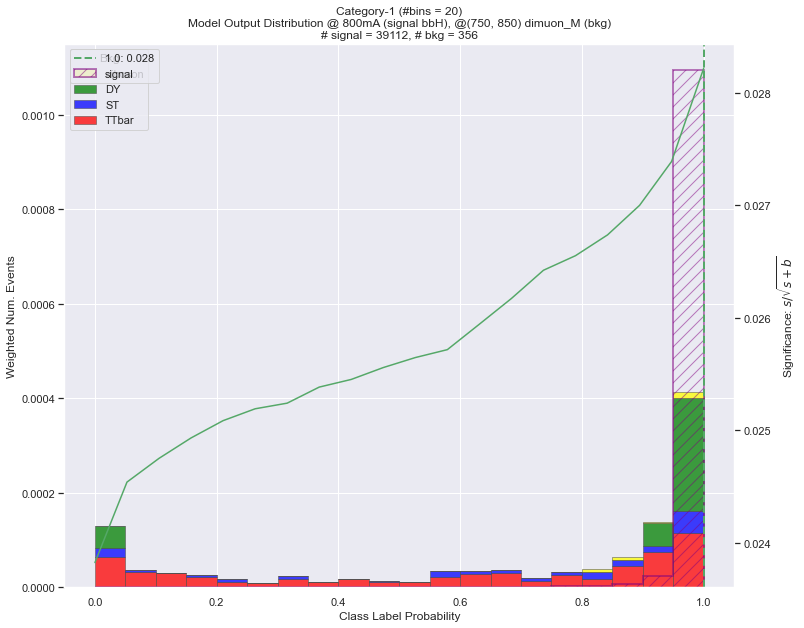

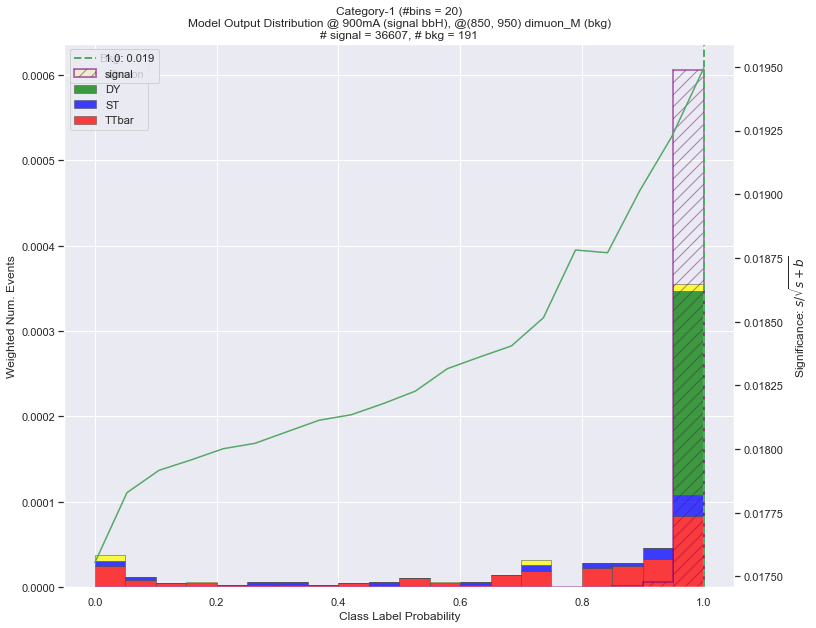

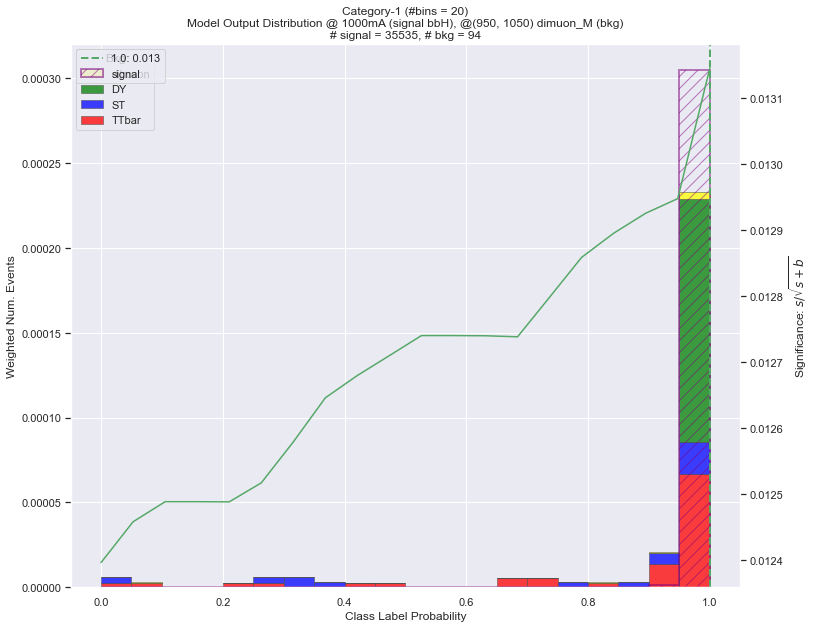

In [14]:
for mass in data.unique_signal_mass:
    cms.plot.significance(model, data_cat1, mass=mass, category=1, signal='bbH',
            path='plot/pNN/inclusive/bbH/balanced/cat-1/performance', save=f'significance_{int(mass)}mA')

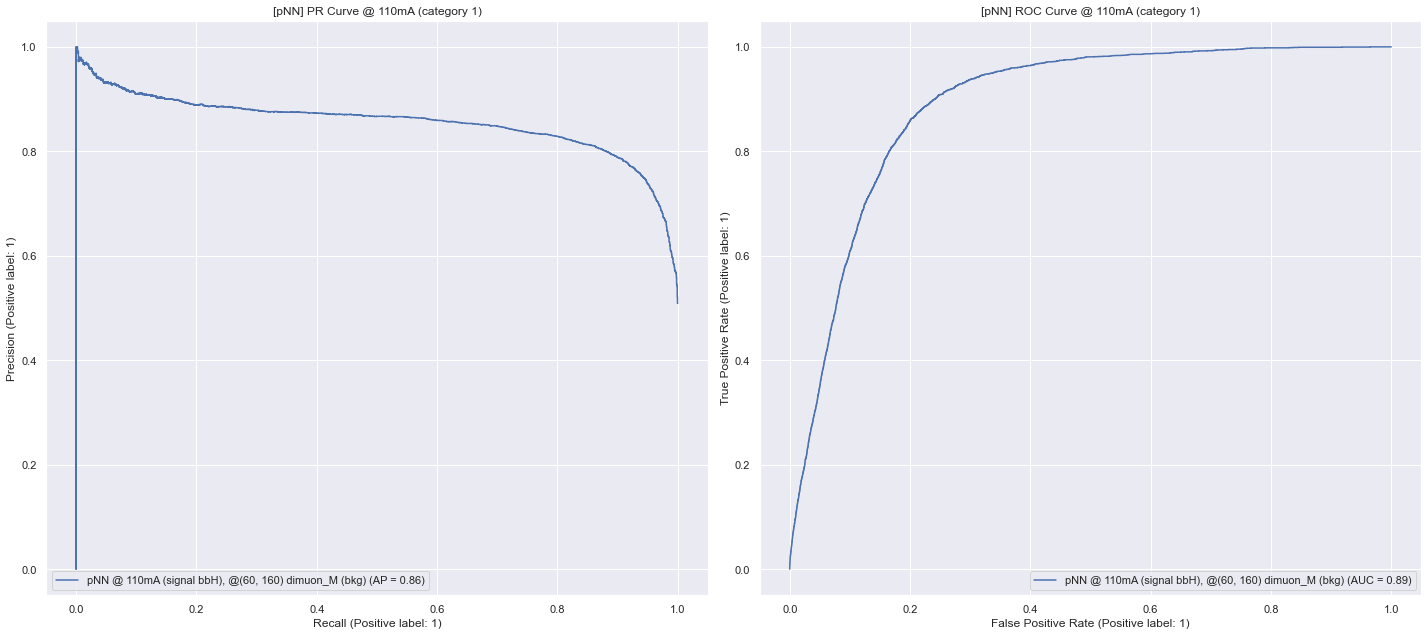

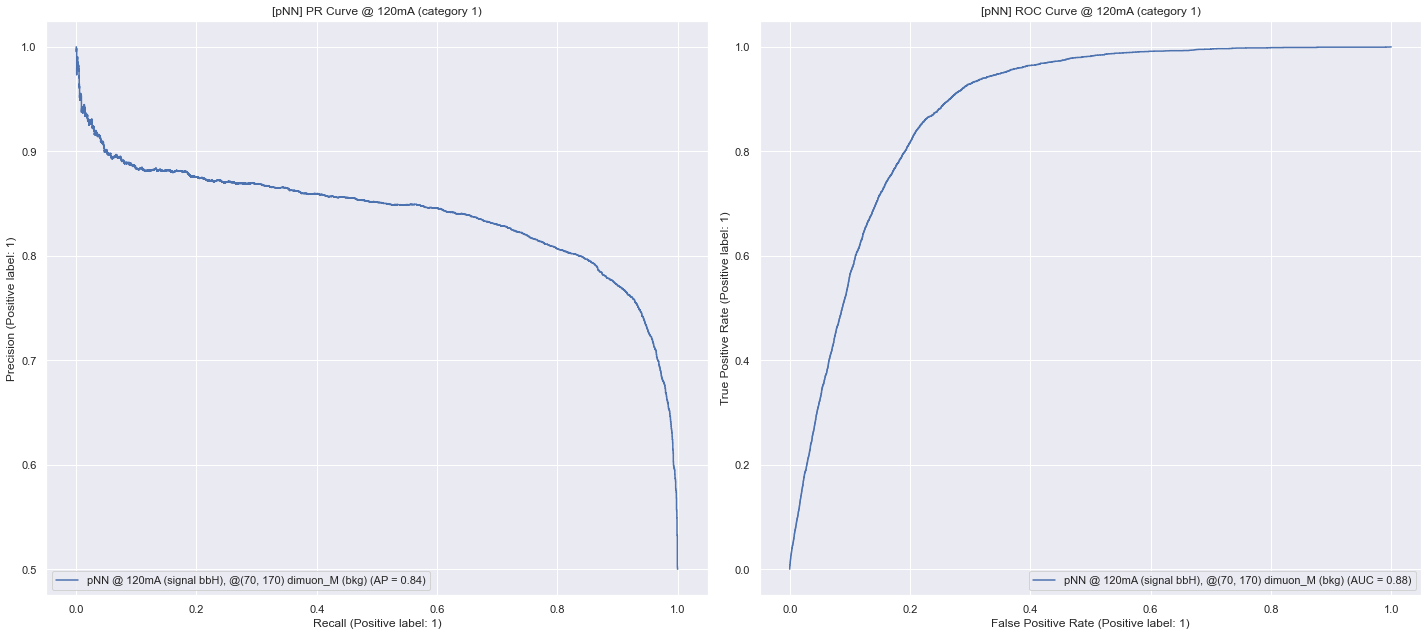

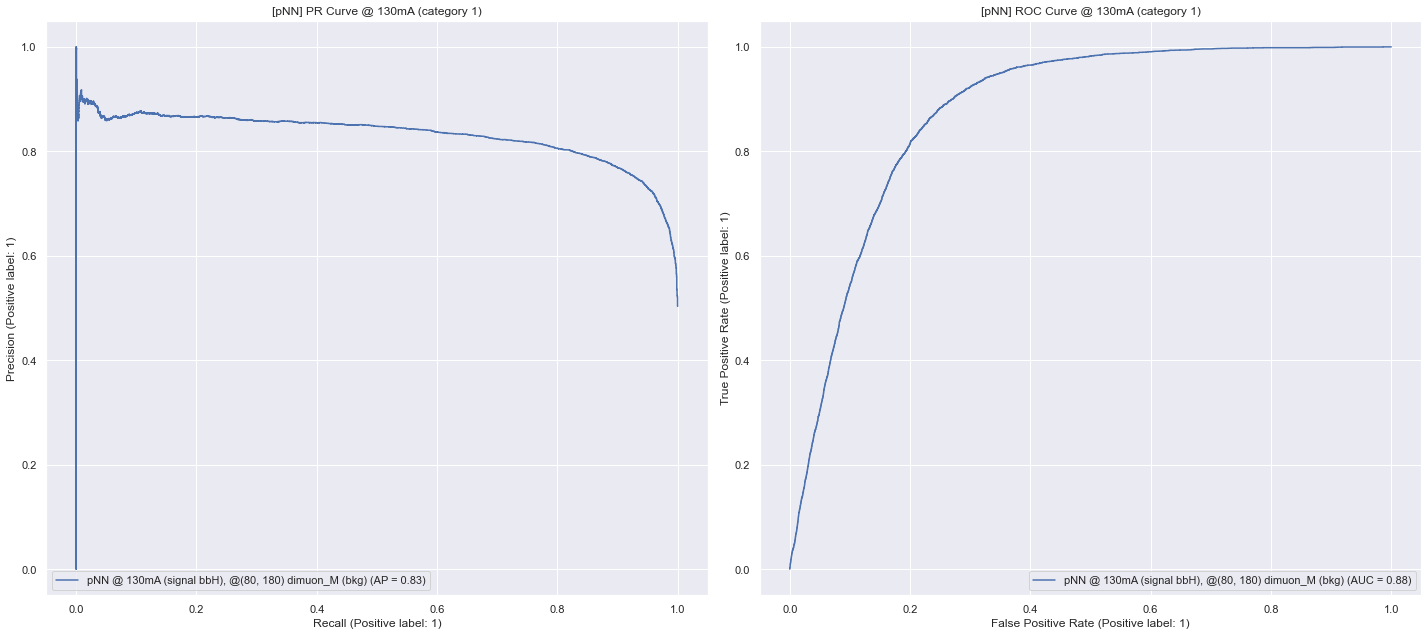

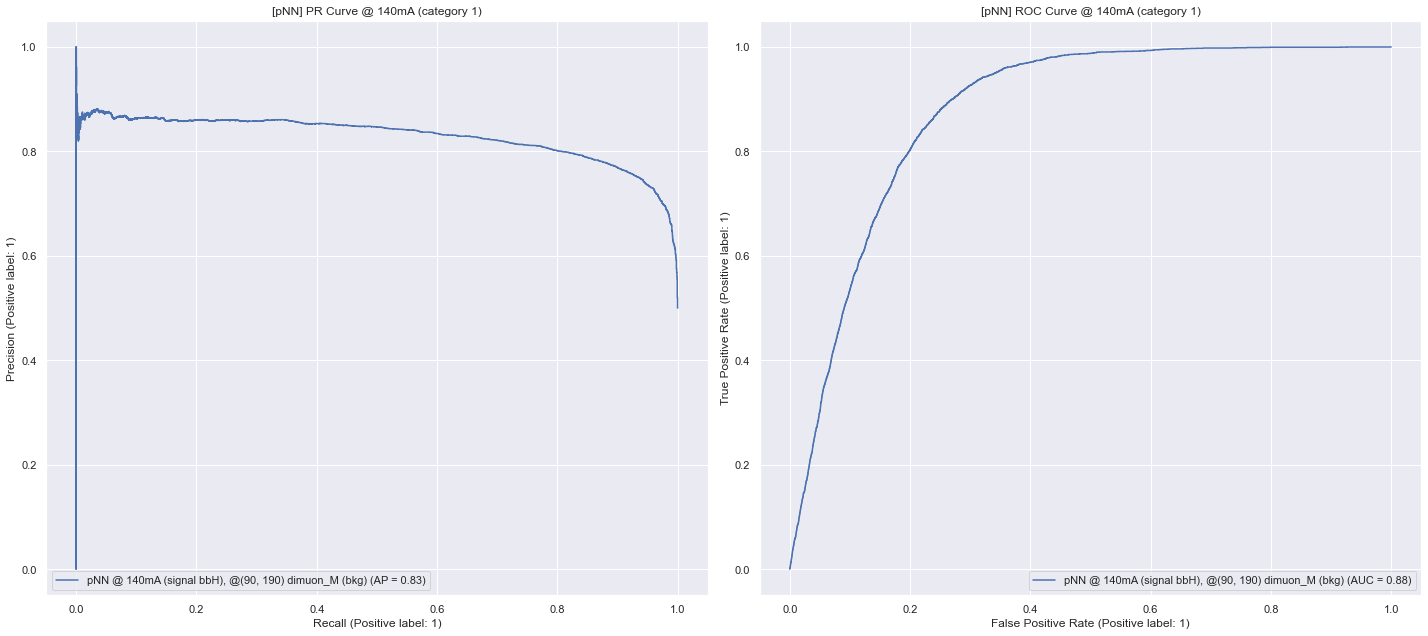

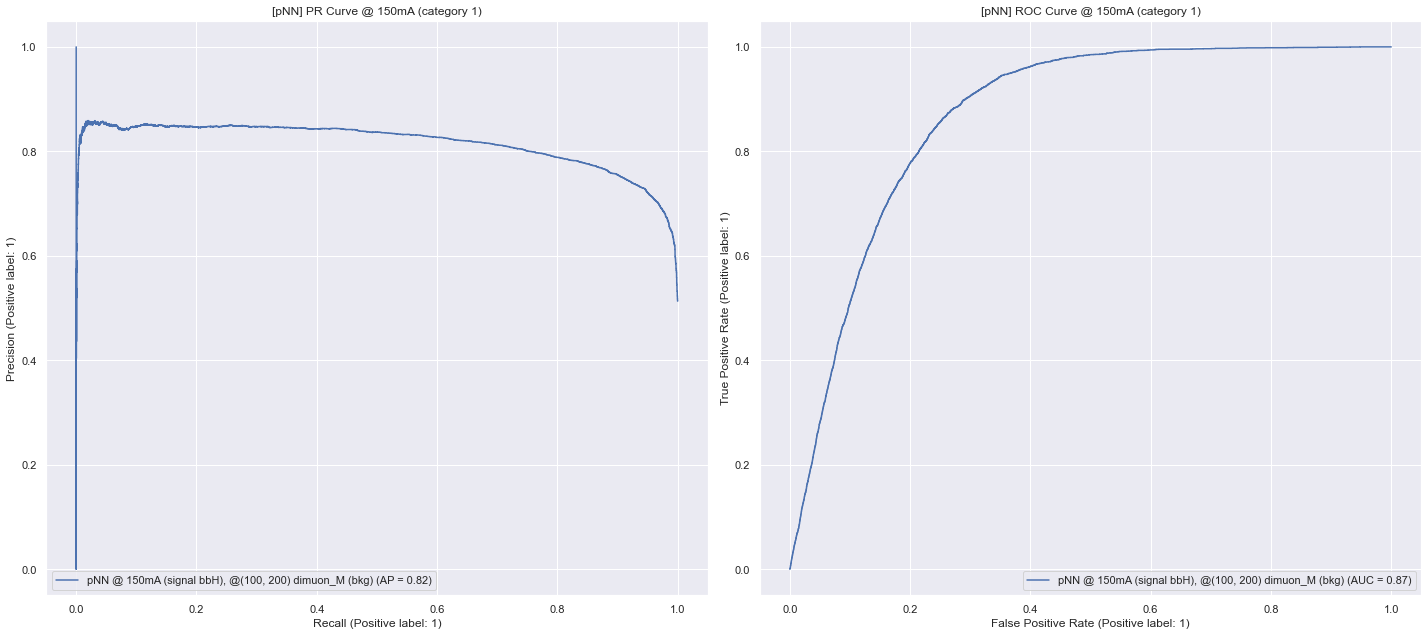

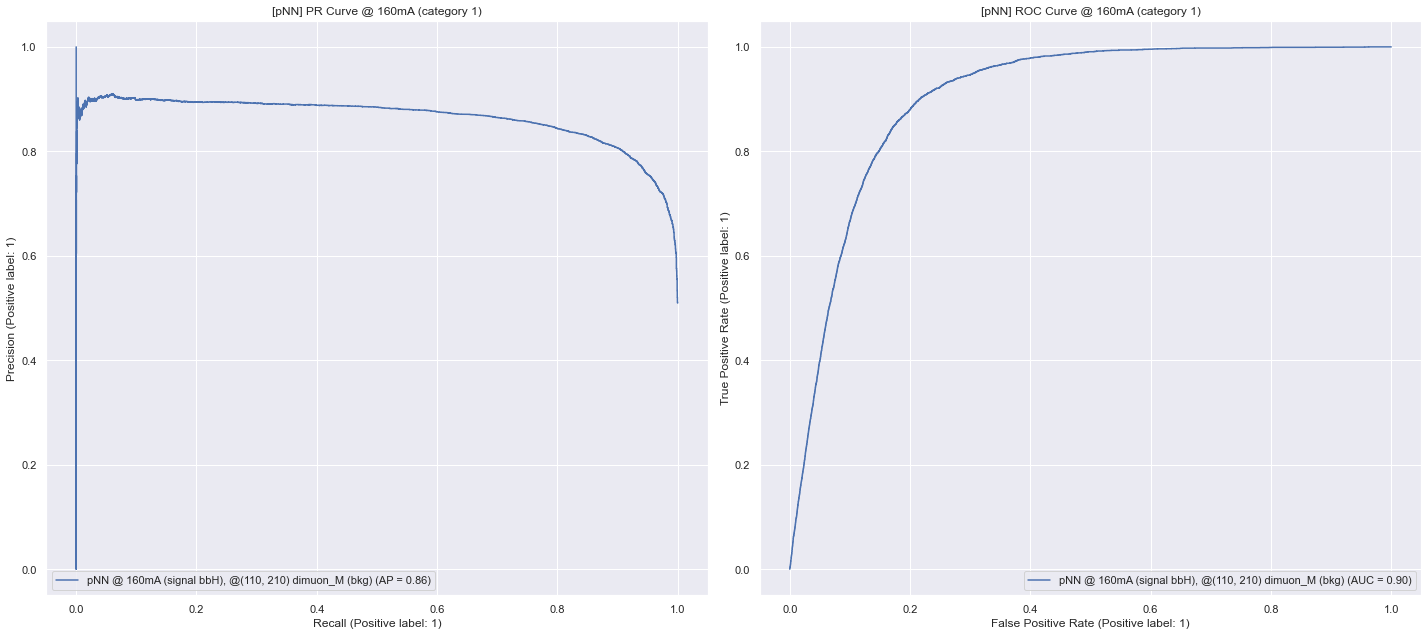

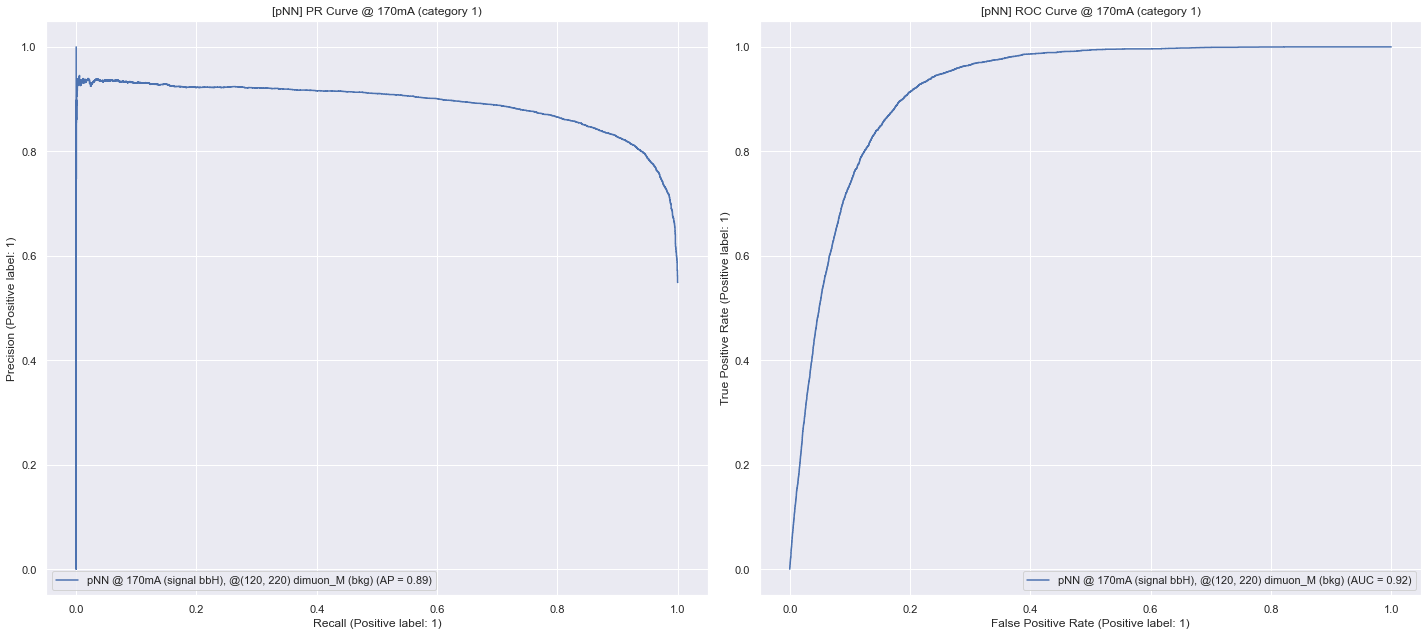

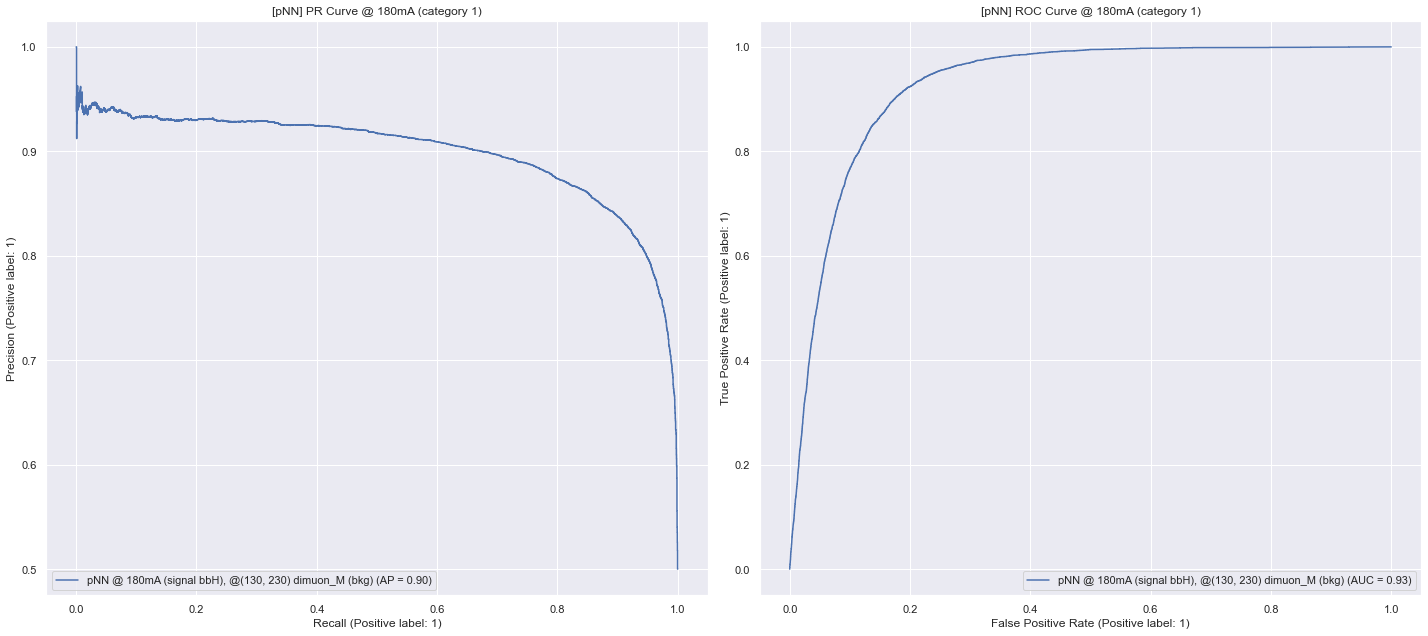

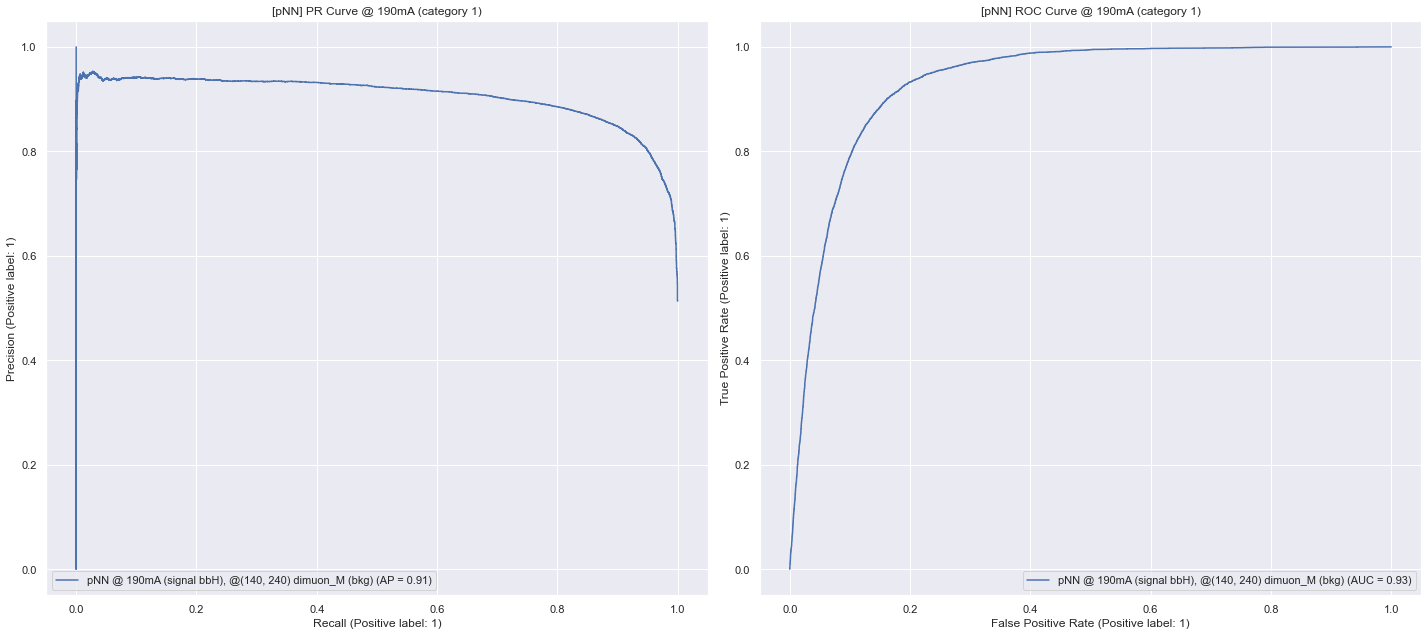

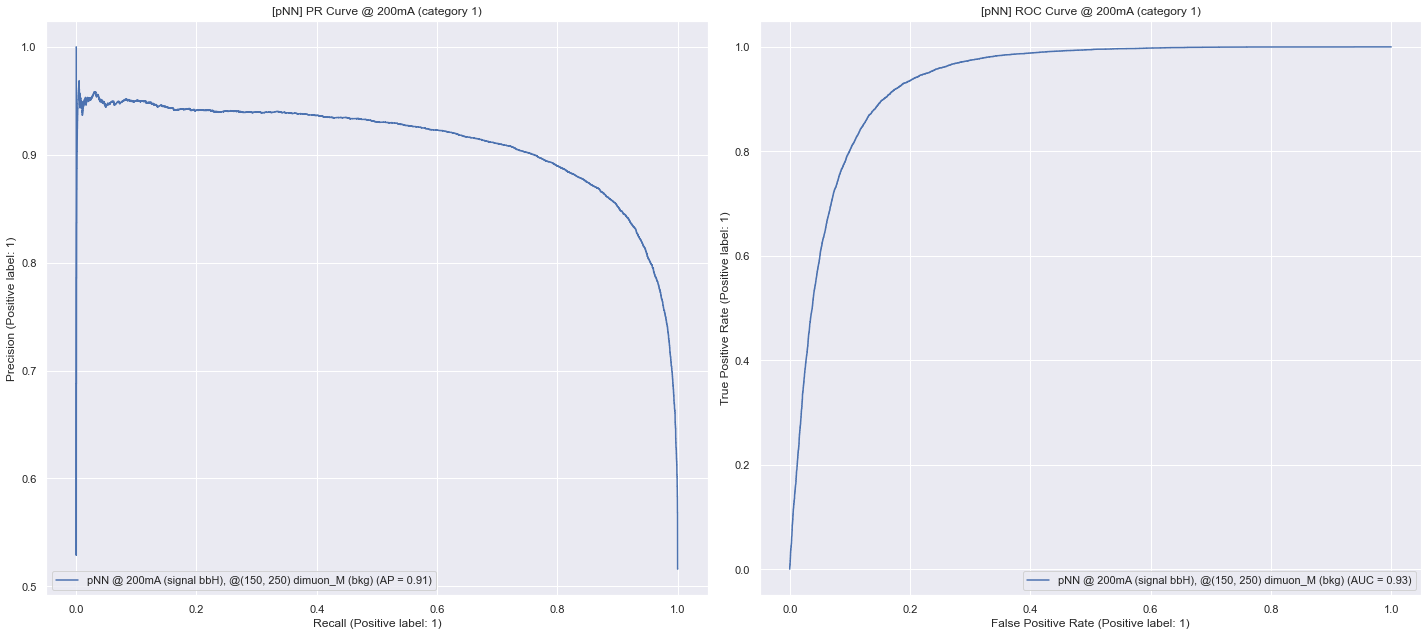

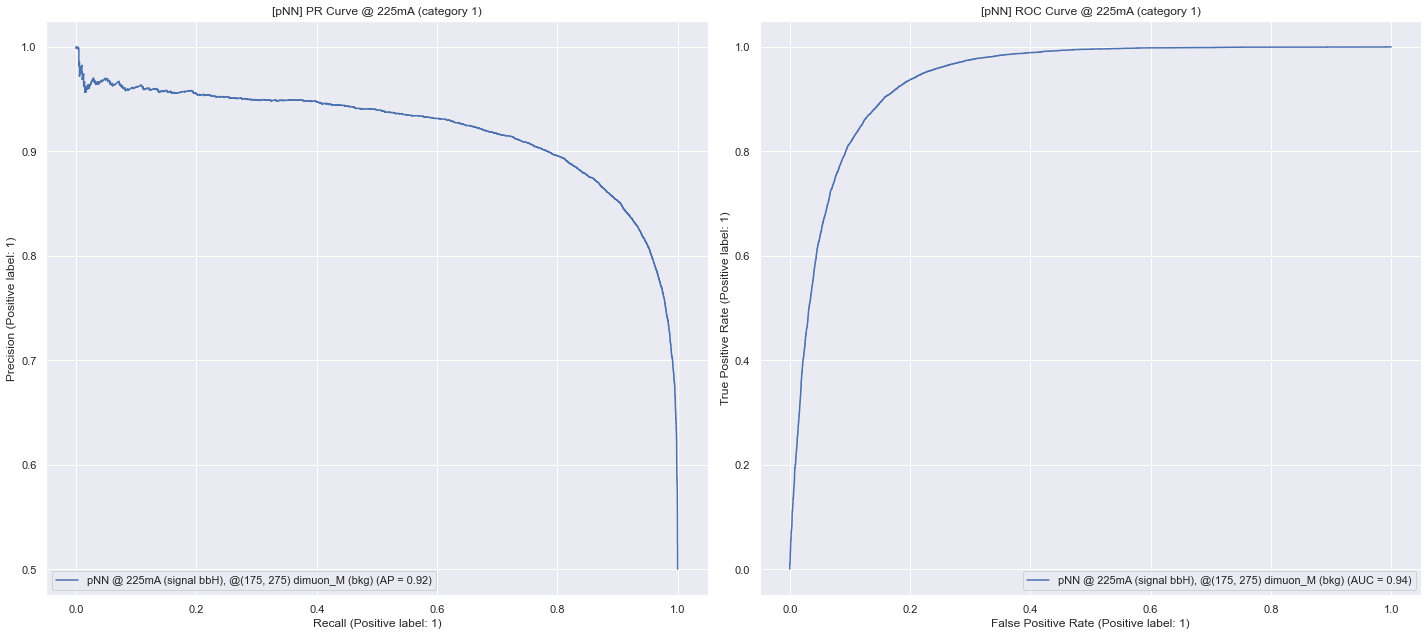

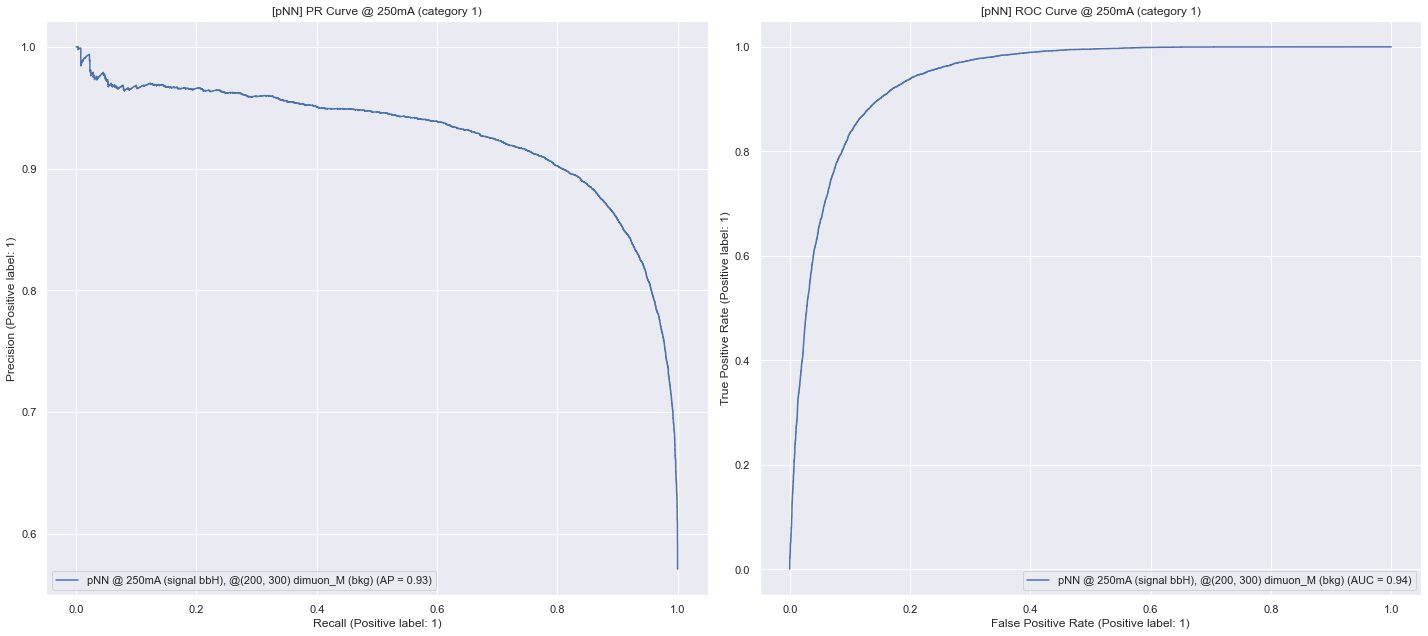

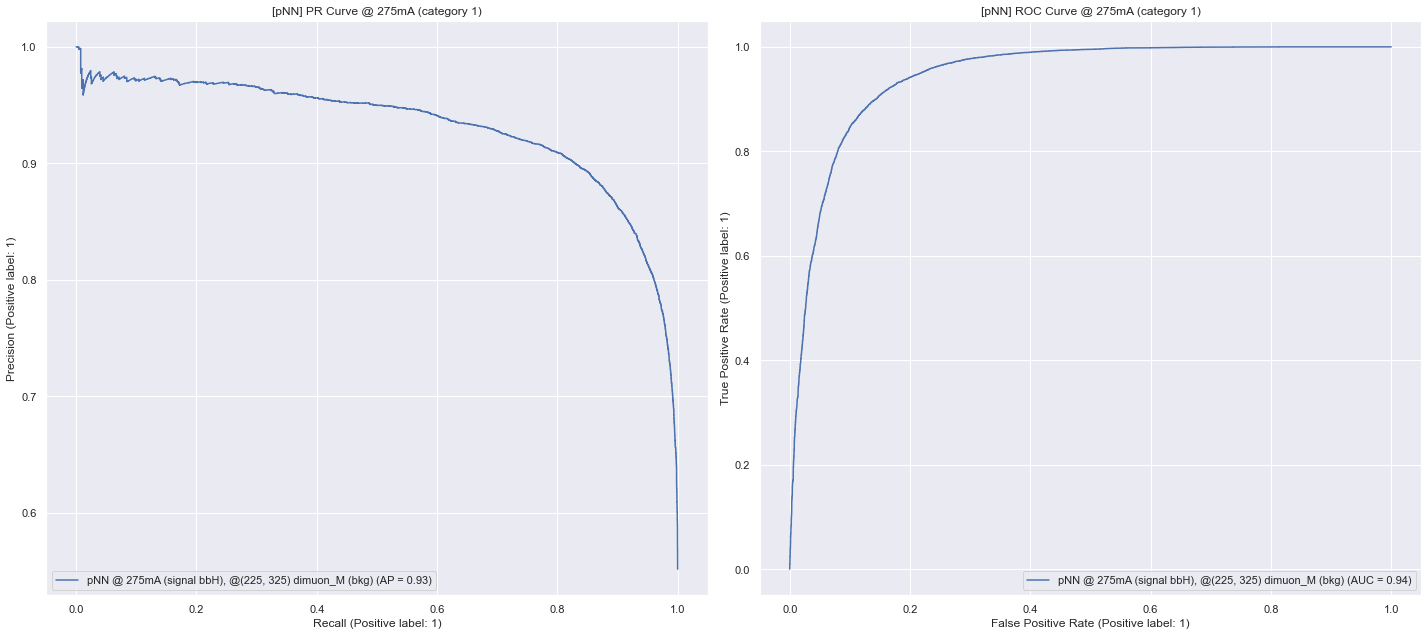

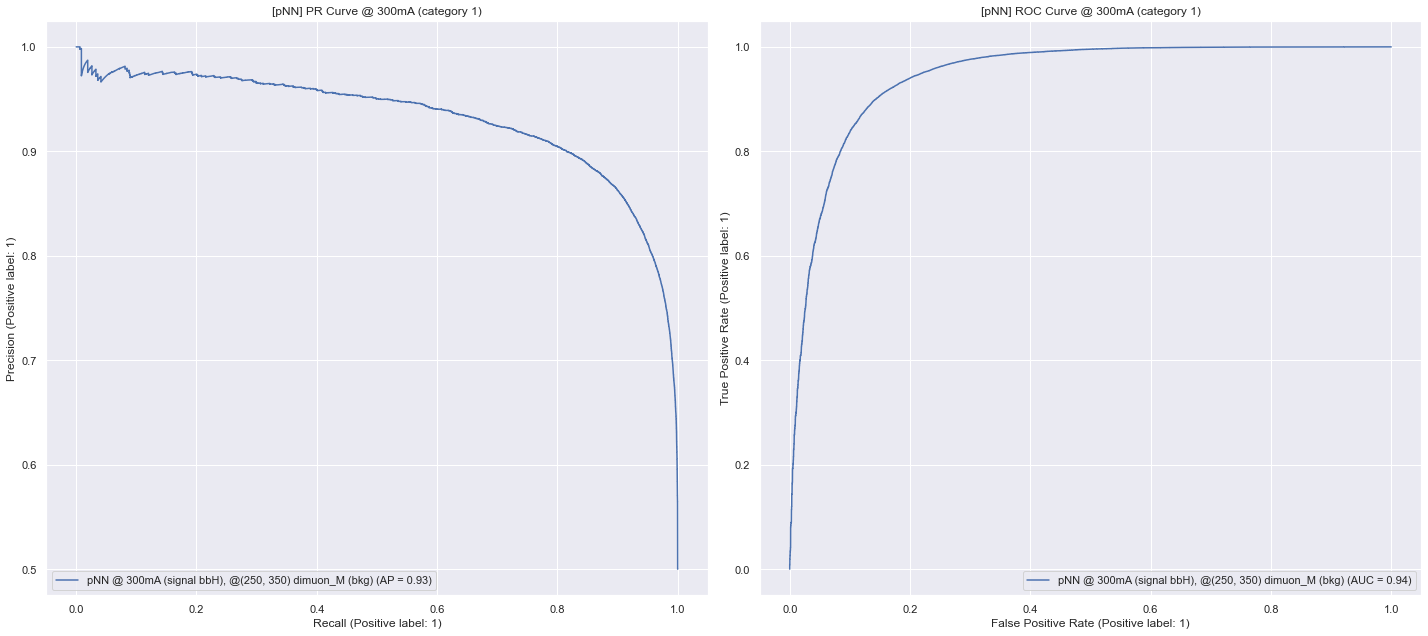

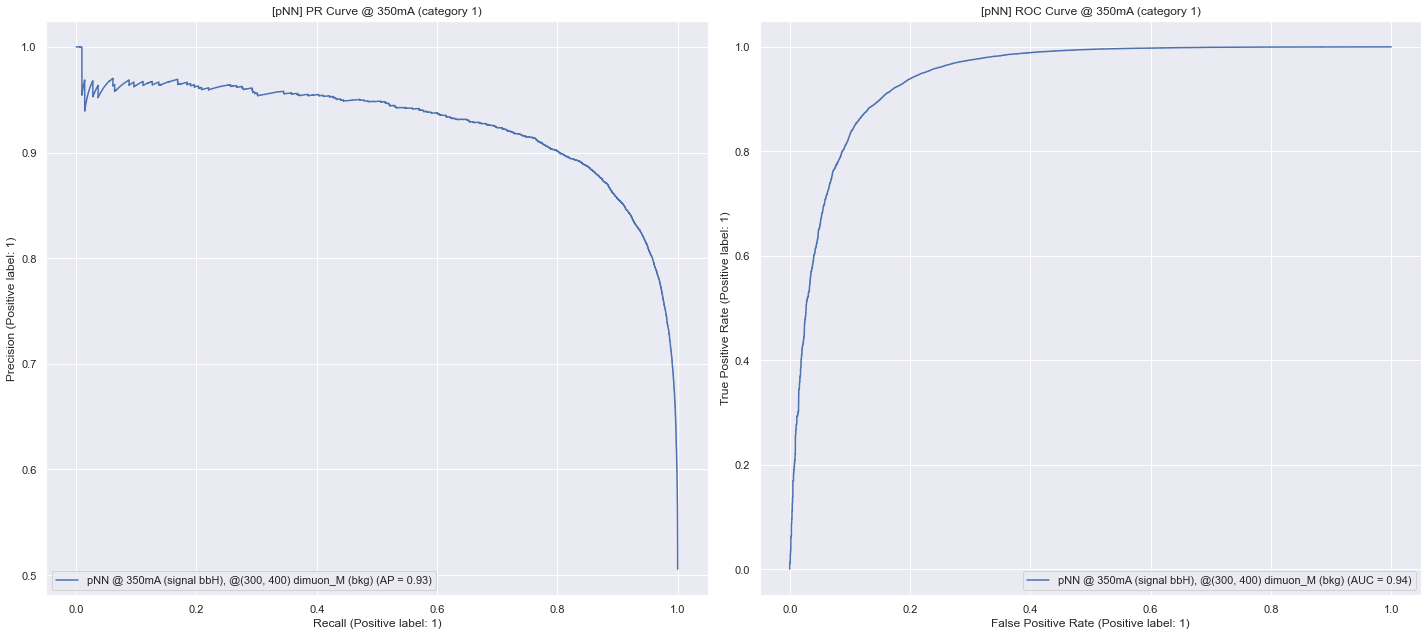

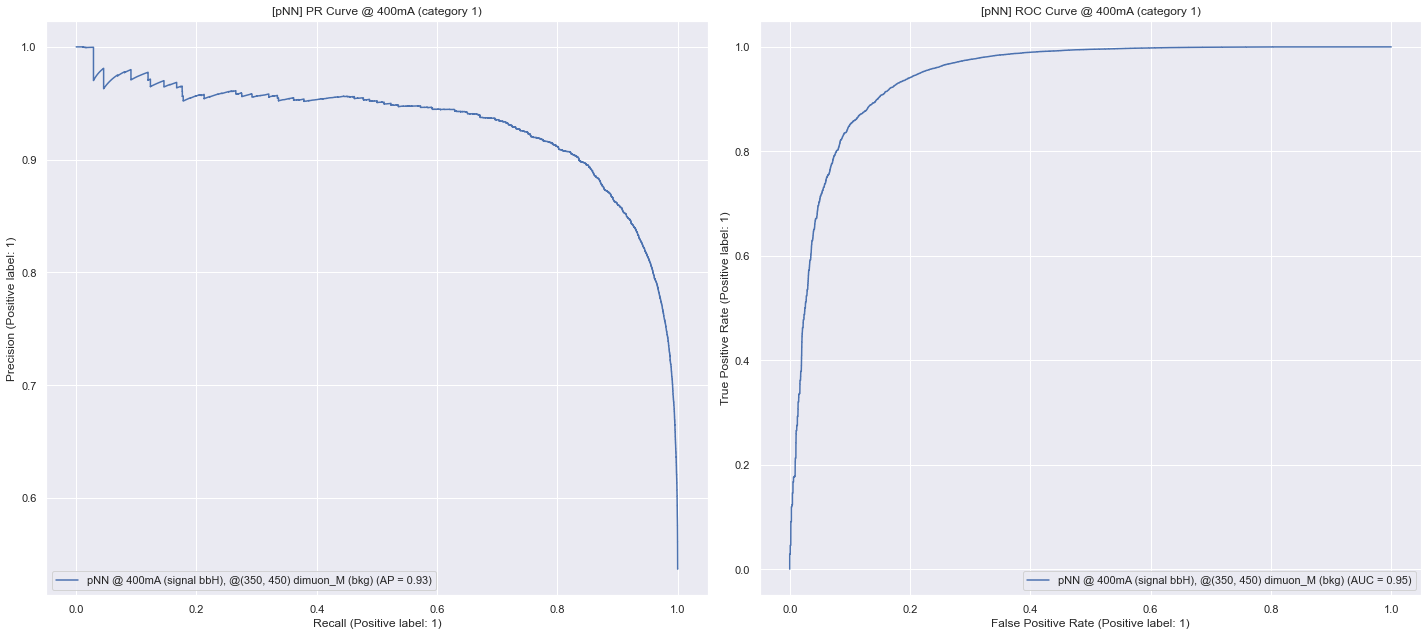

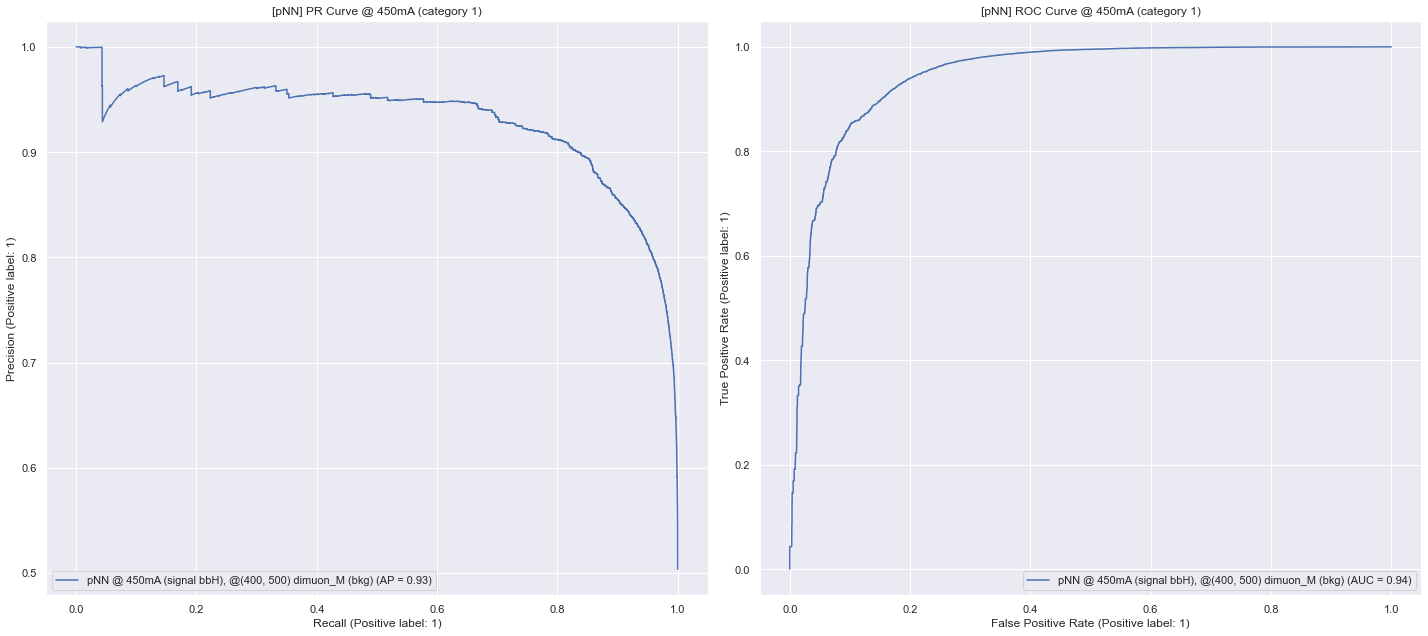

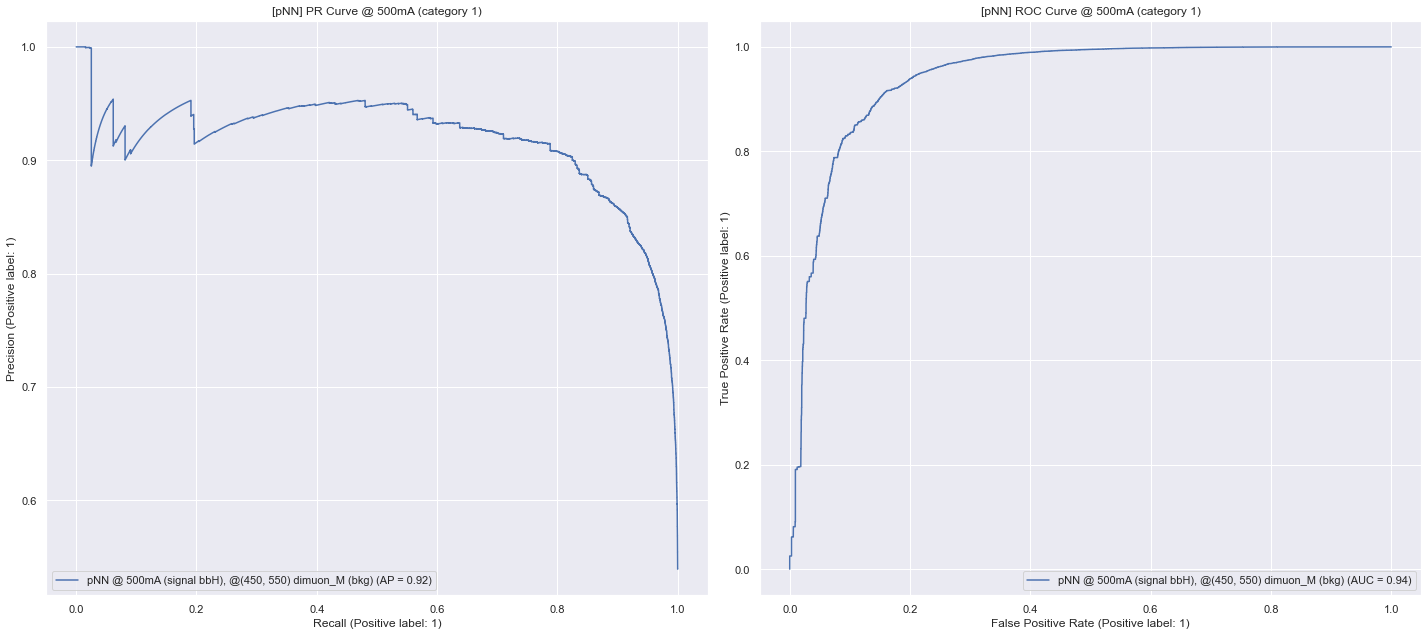

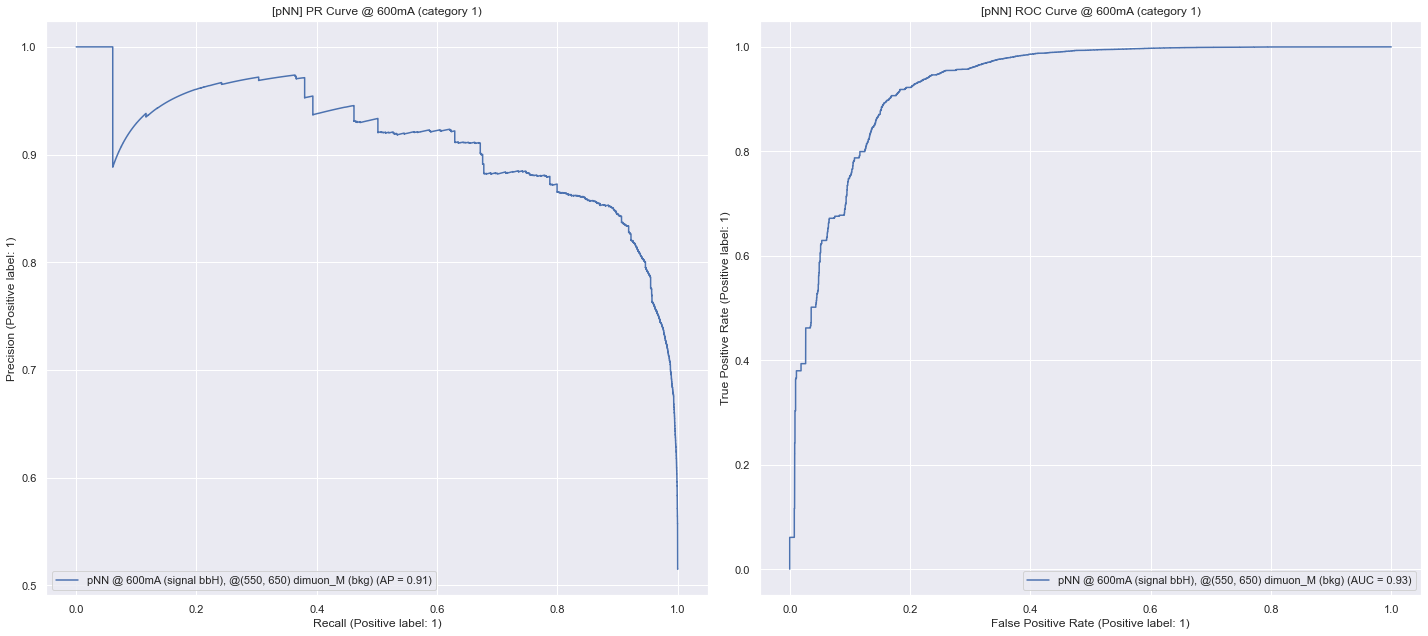

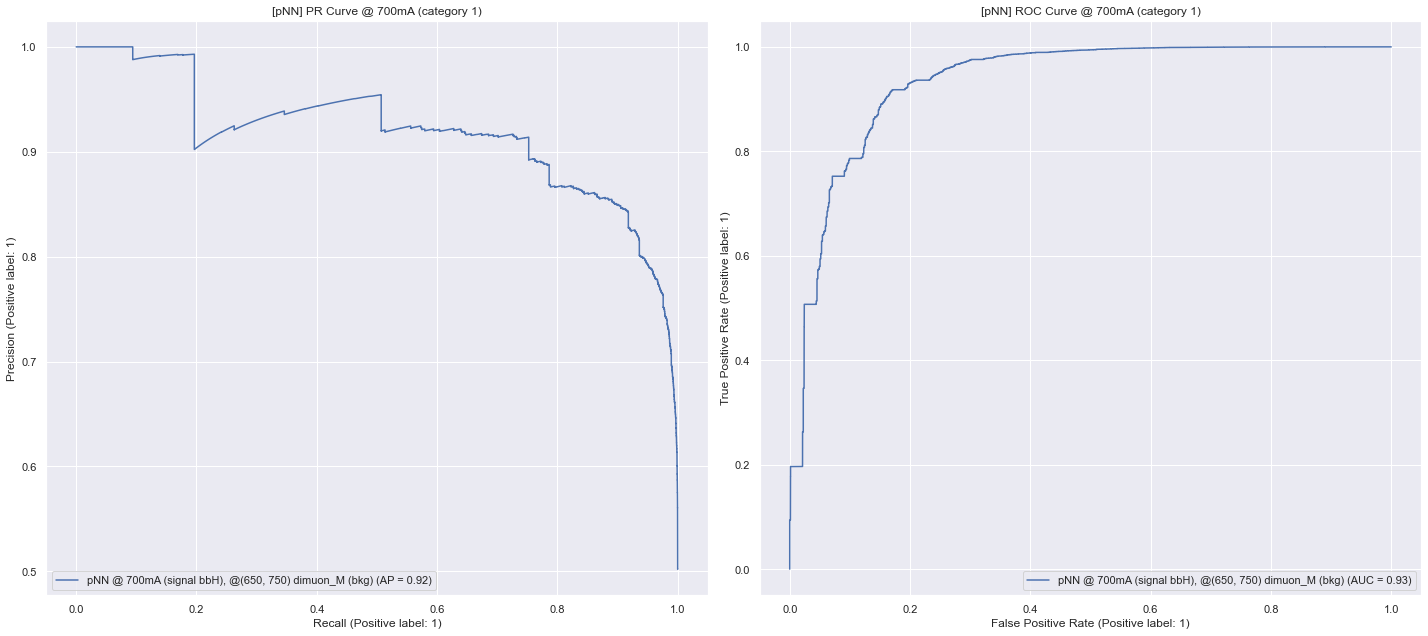

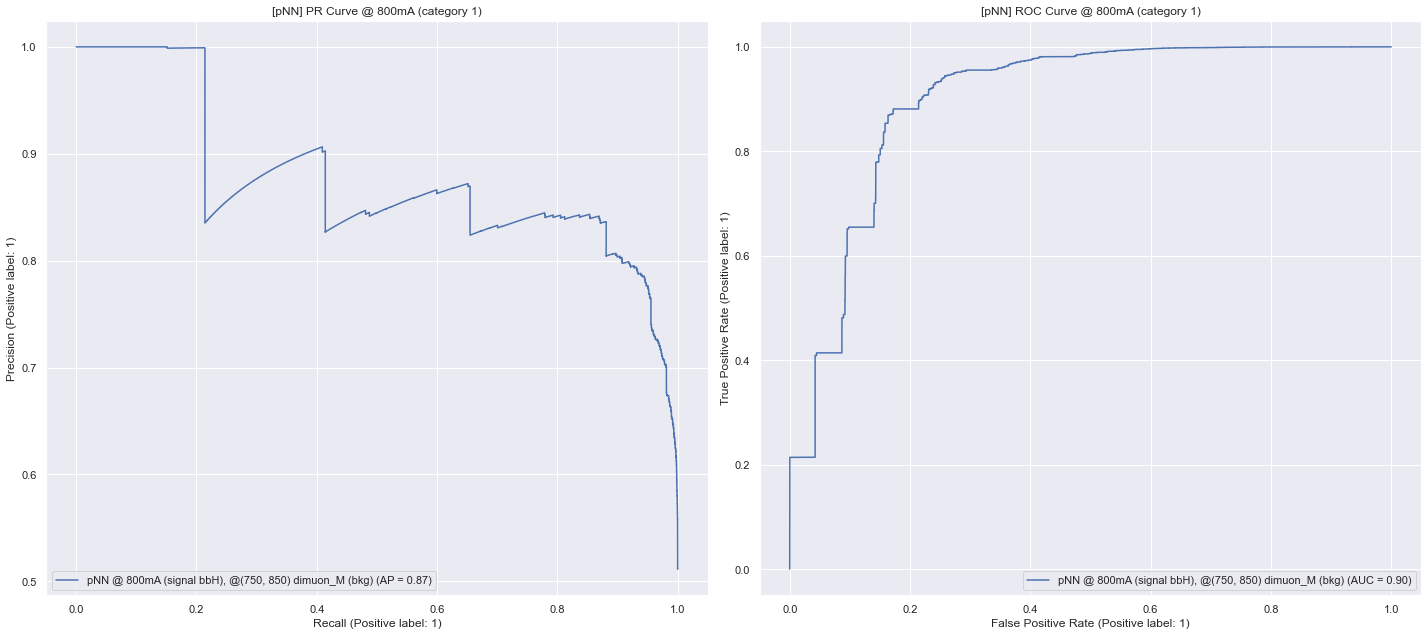

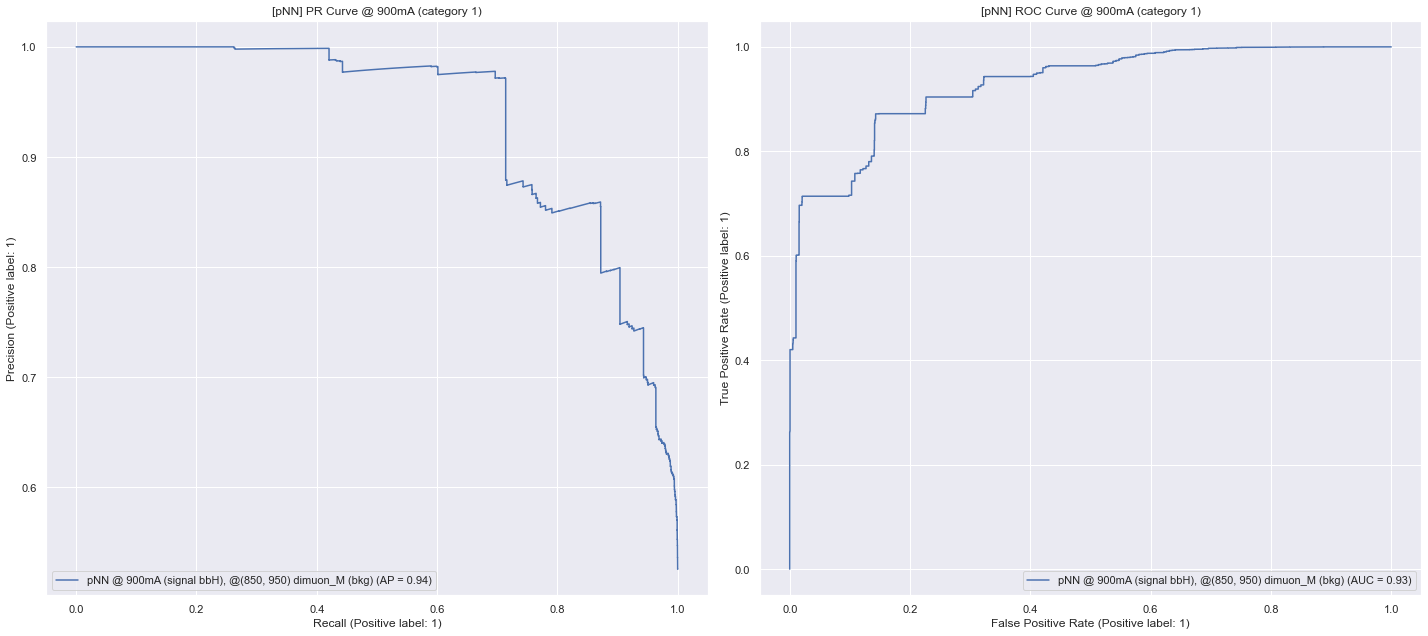

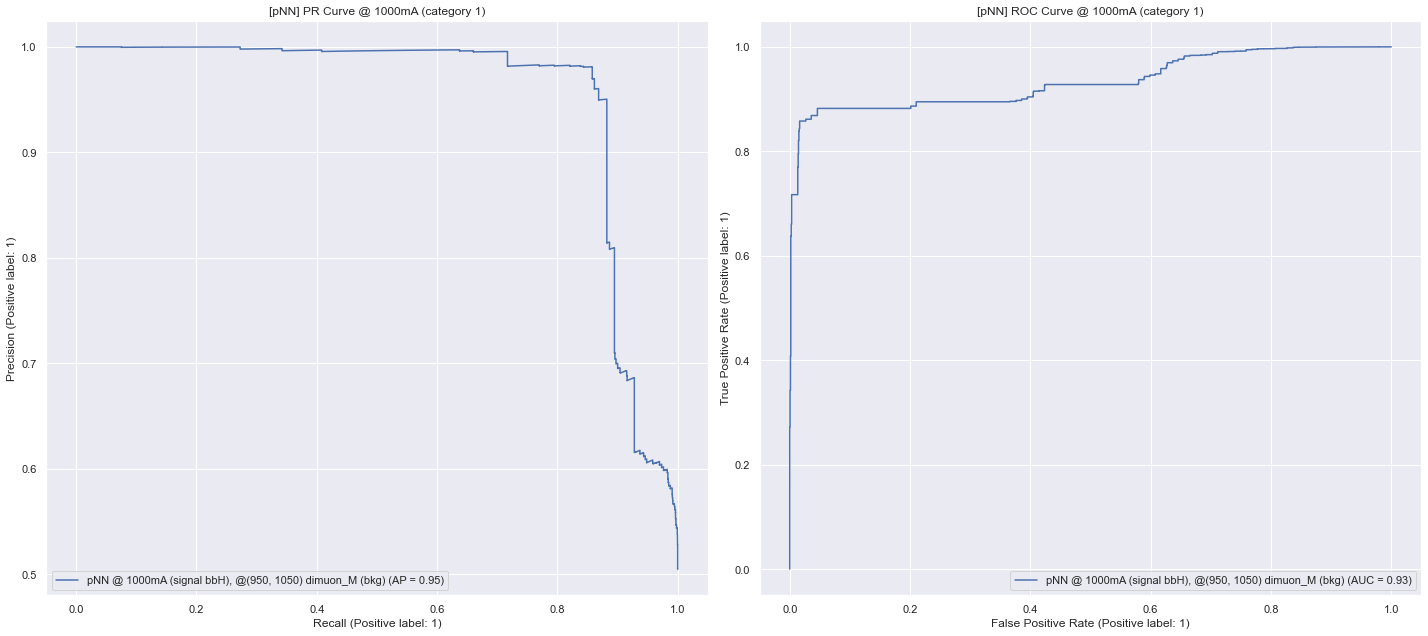

In [15]:
for mass in data.unique_signal_mass:
    cms.plot.curves(model, data_cat1, mass=mass, category=1, signal='bbH',
                    path='plot/pNN/inclusive/bbH/balanced/cat-1/performance', save=f'curves_{int(mass)}mA')

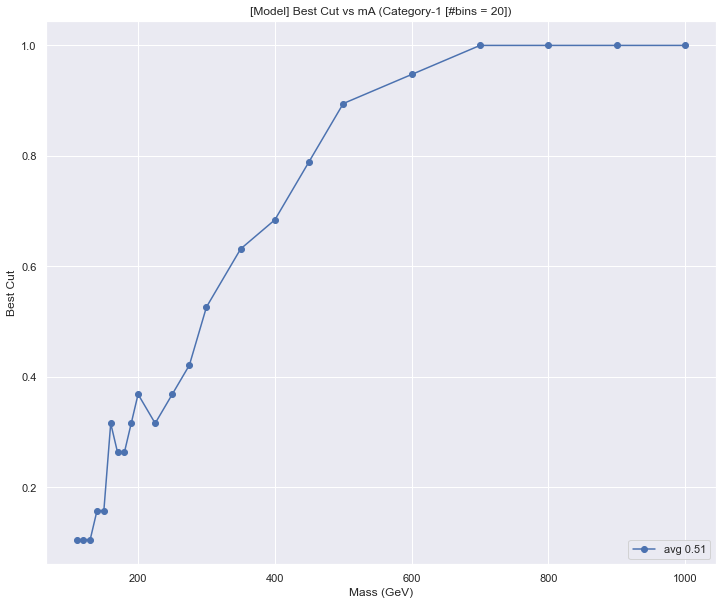

In [16]:
_ = cms.plot.cut(model, data_cat1, category=1, signal='bbH', legend='lower right',
                 path='plot/pNN/inclusive/bbH/balanced/cat-1/performance', save='best-cut_vs_mA')

Evaluate on **category 2**:

In [7]:
sig_cat2 = data.signal[data.signal['bjet_n'] == 0]
bkg_cat2 = data.background[data.background['bjet_n'] == 0]

In [8]:
data_cat2 = Dataset()
data_cat2.load(signal=sig_cat2.reset_index(drop=True), 
               bkg=bkg_cat2.reset_index(drop=True), feature_columns=VARIABLES)

del sig_cat2, bkg_cat2
free_mem()

data_cat2.names_df = pd.DataFrame({'name': data_cat2.background['name']})

[Dataset] loaded.


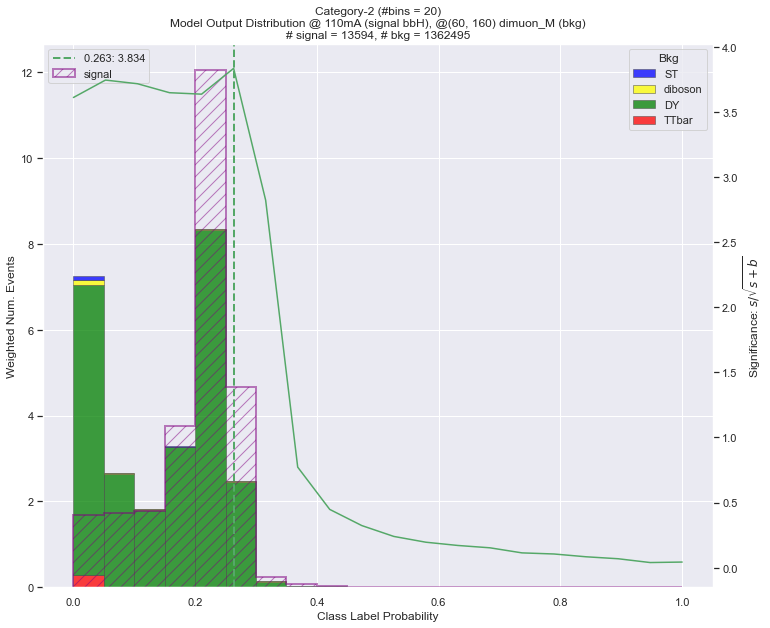

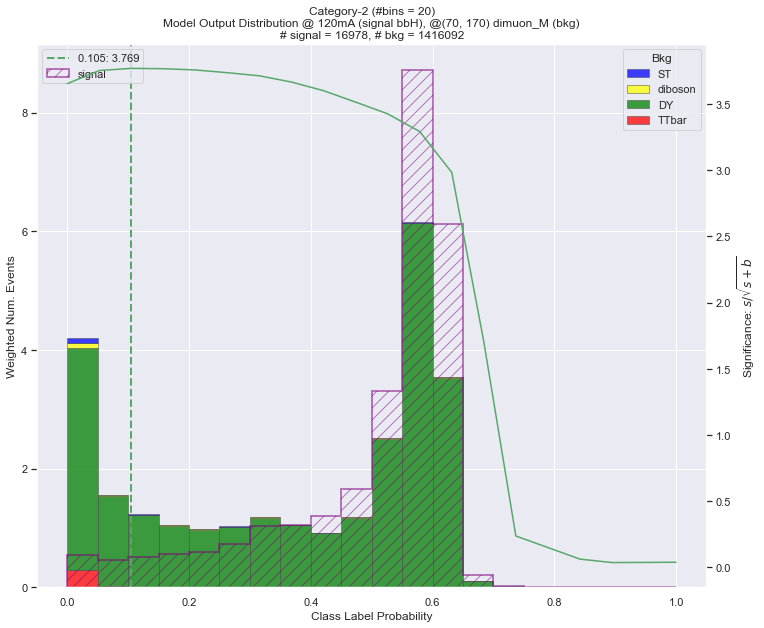

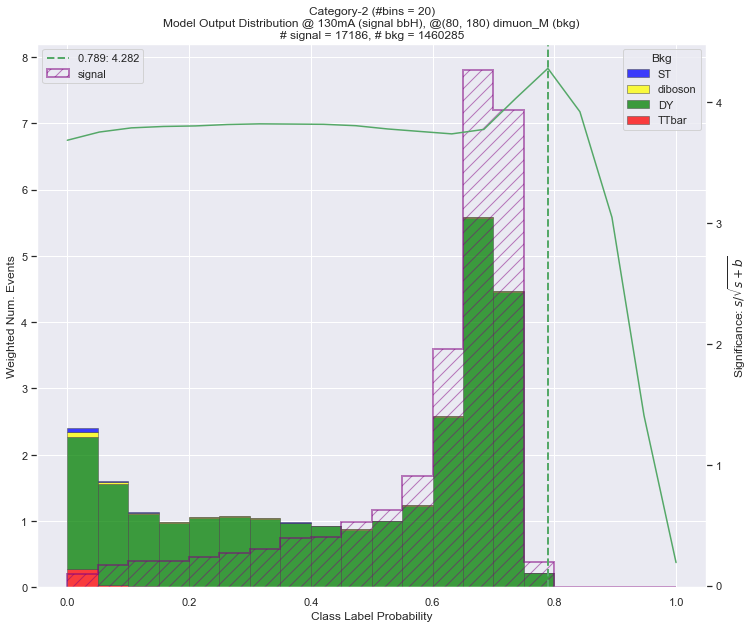

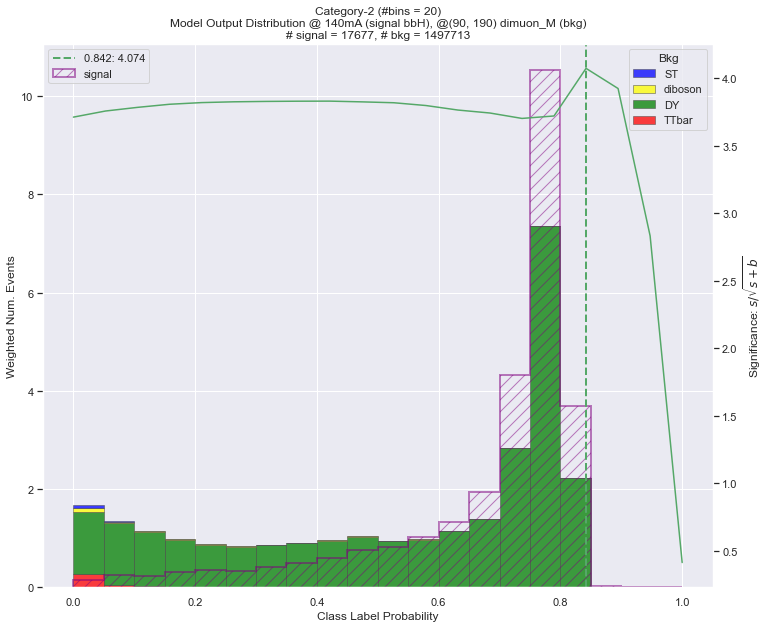

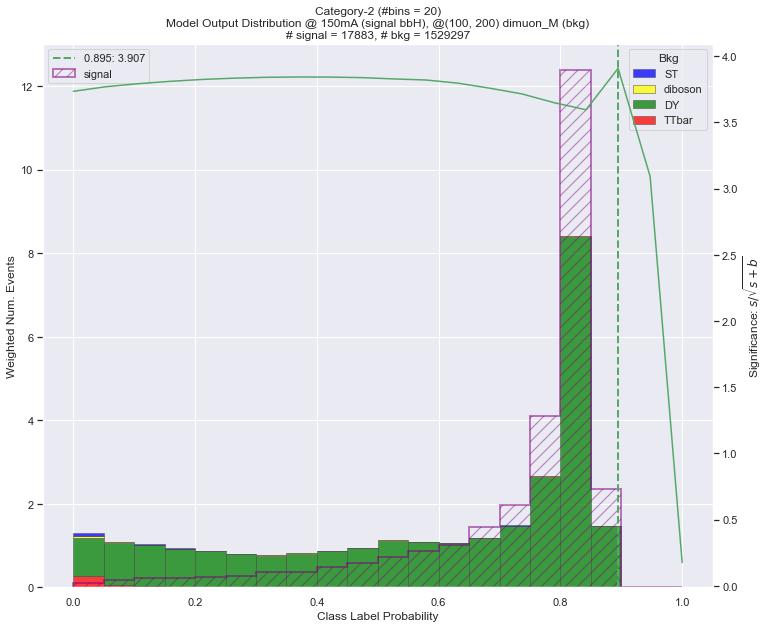

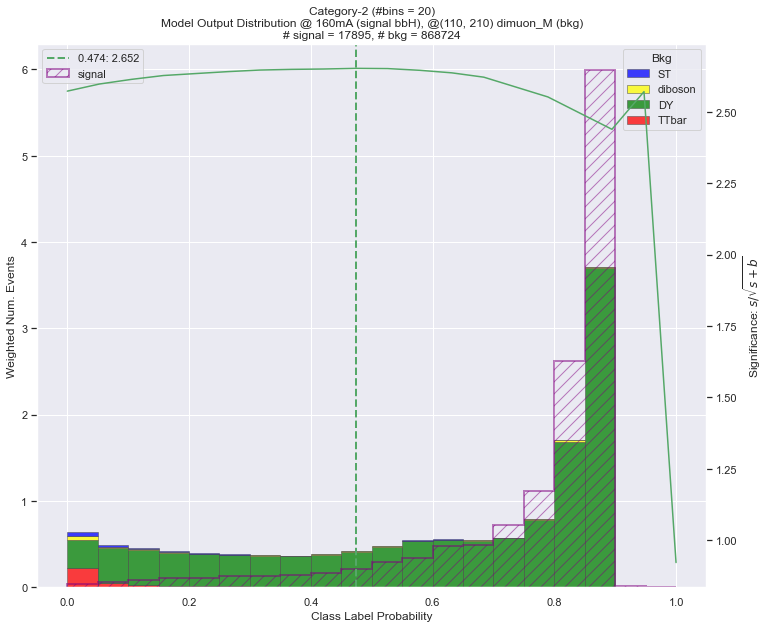

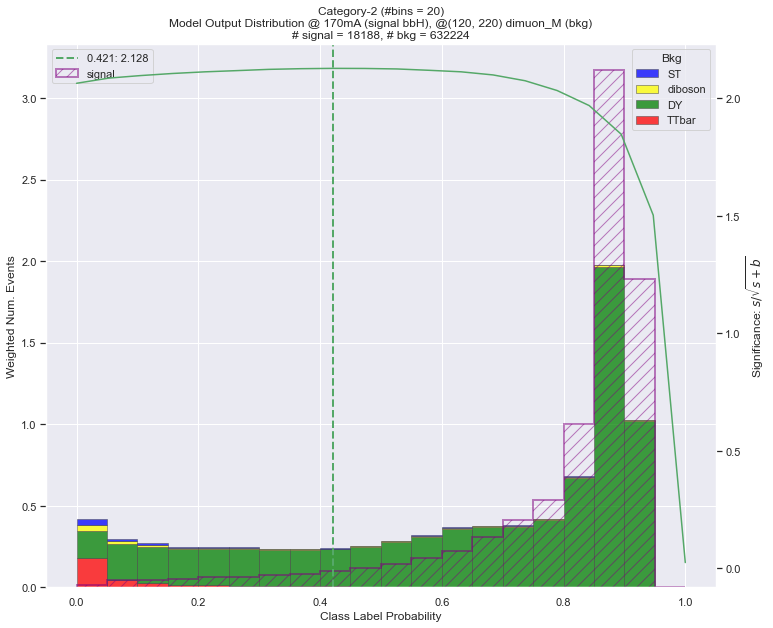

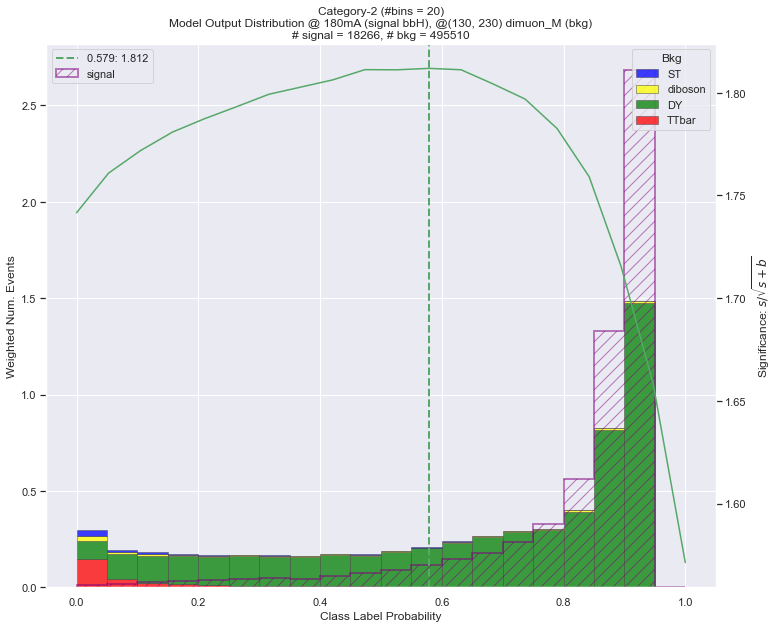

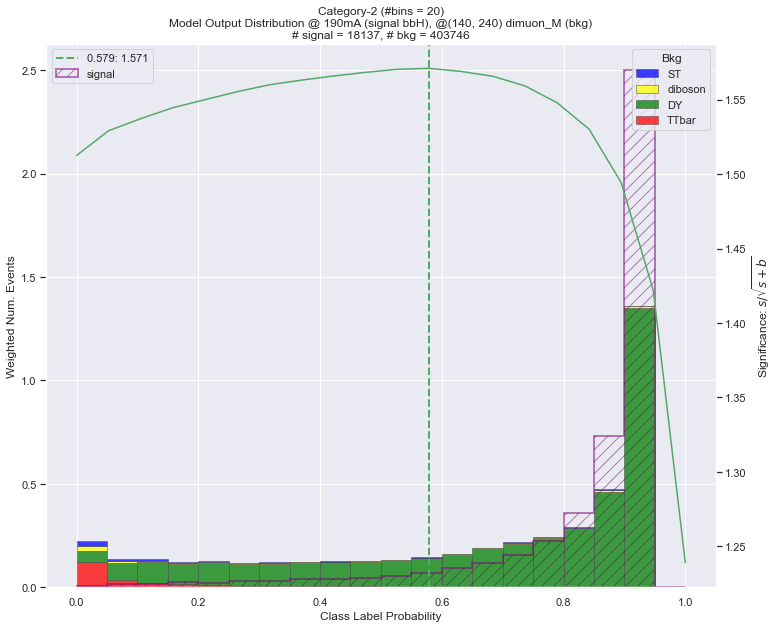

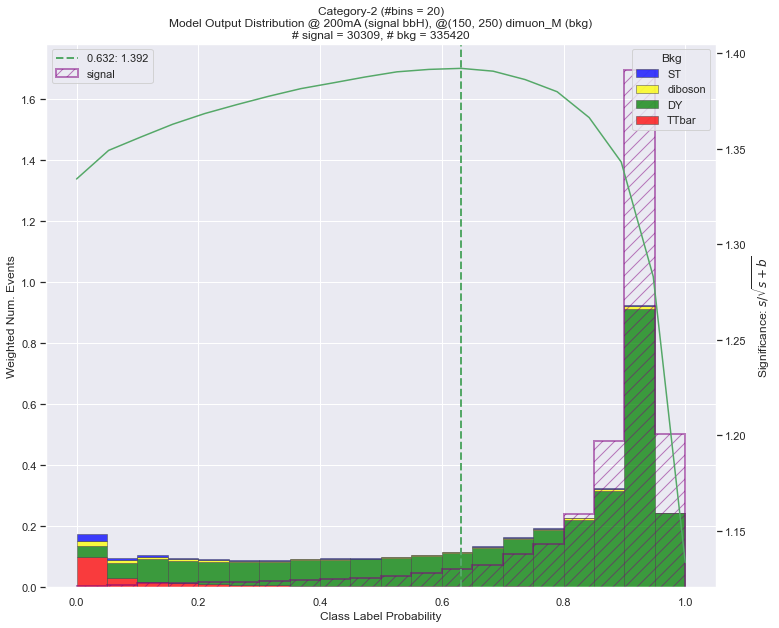

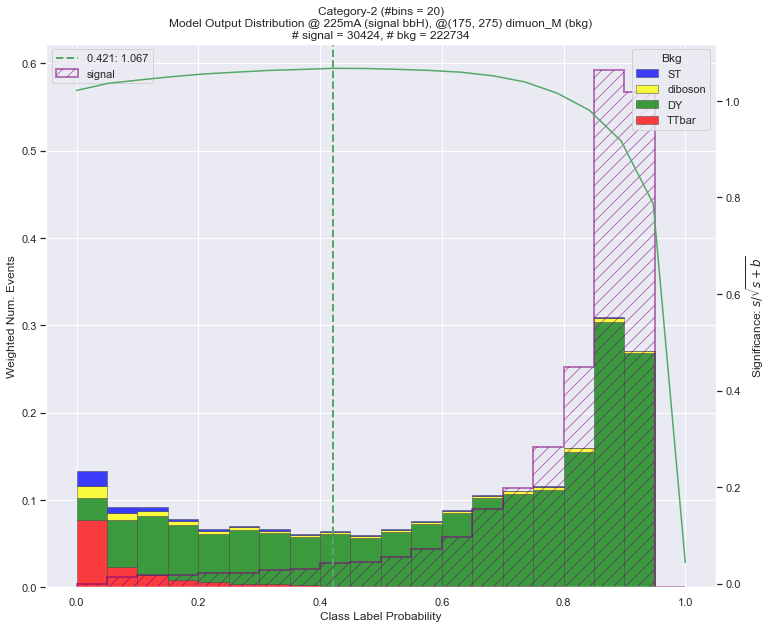

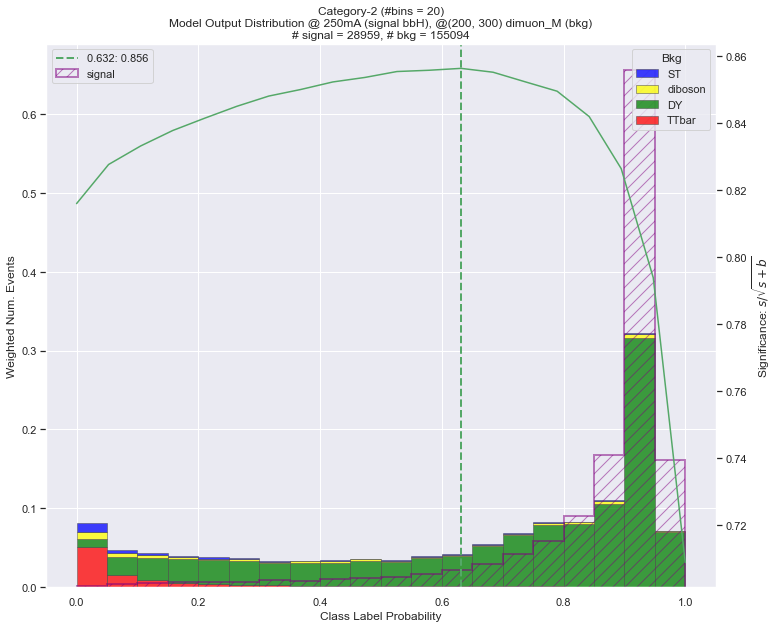

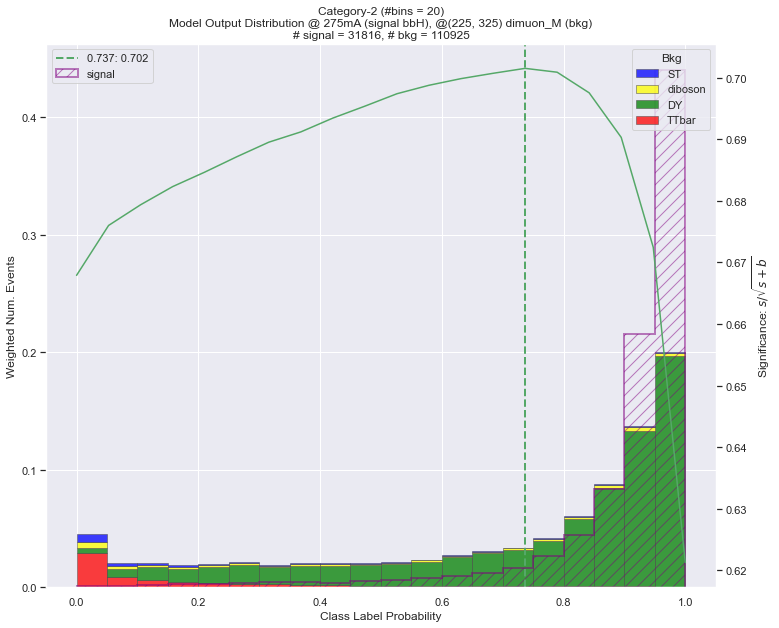

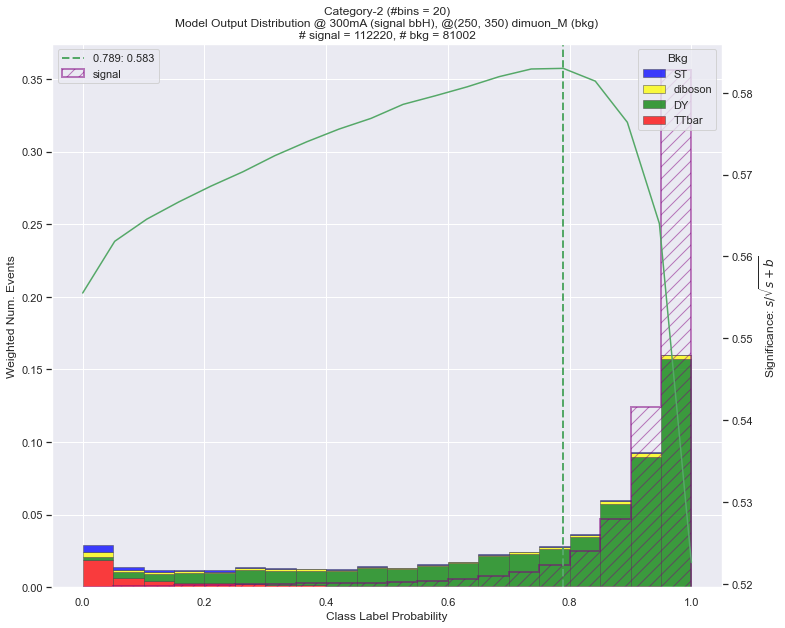

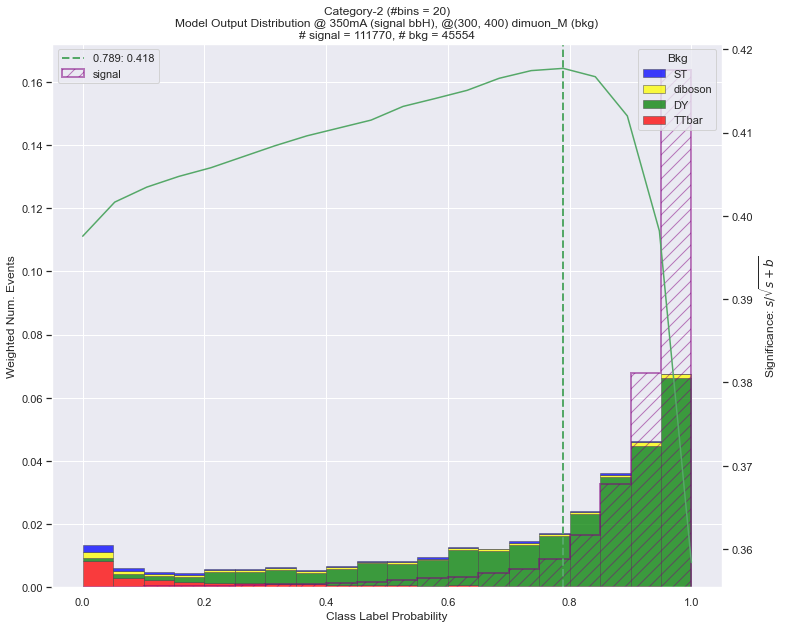

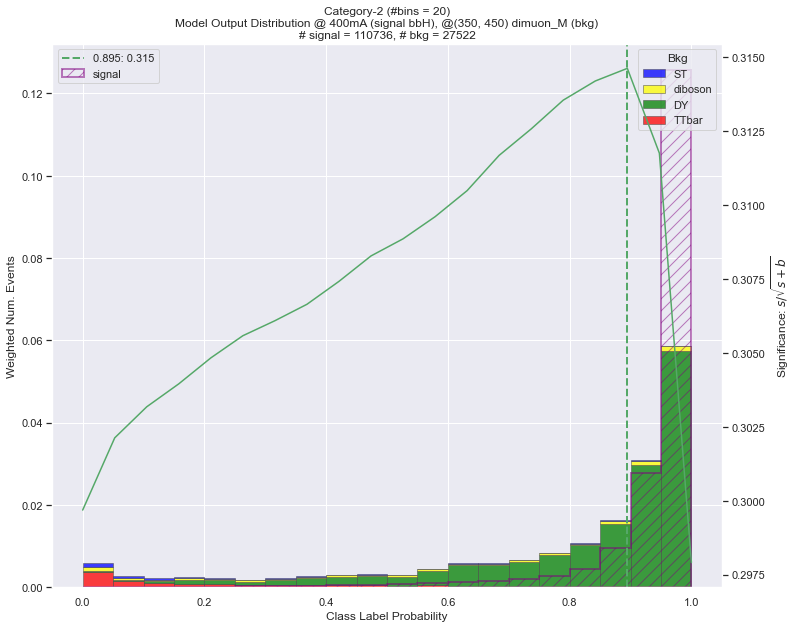

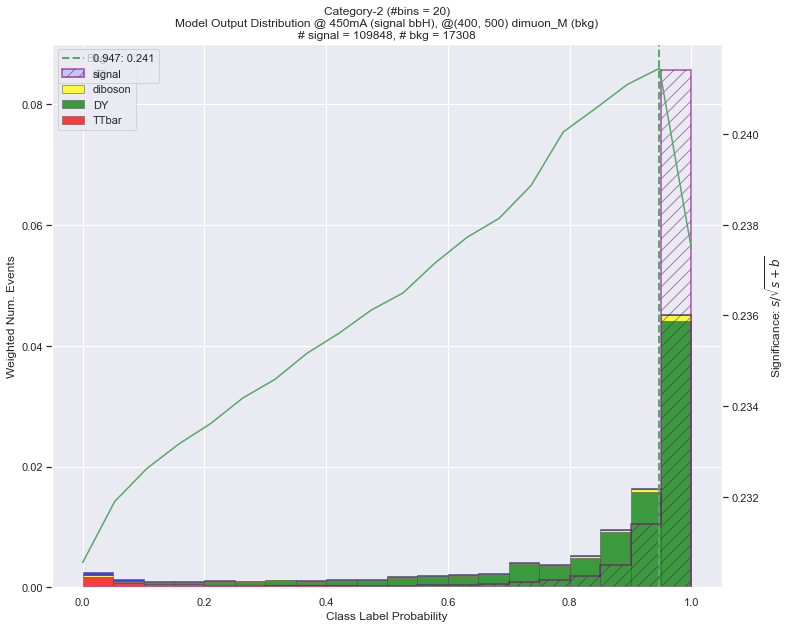

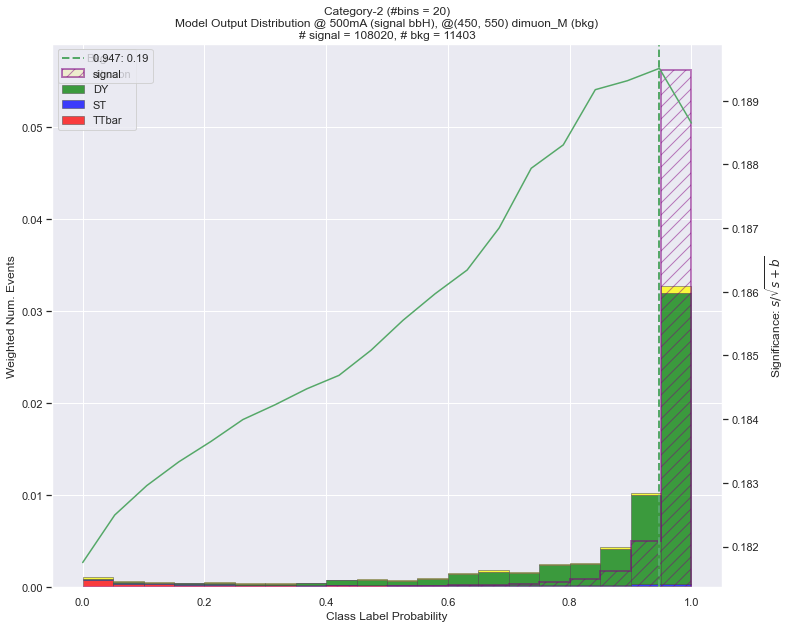

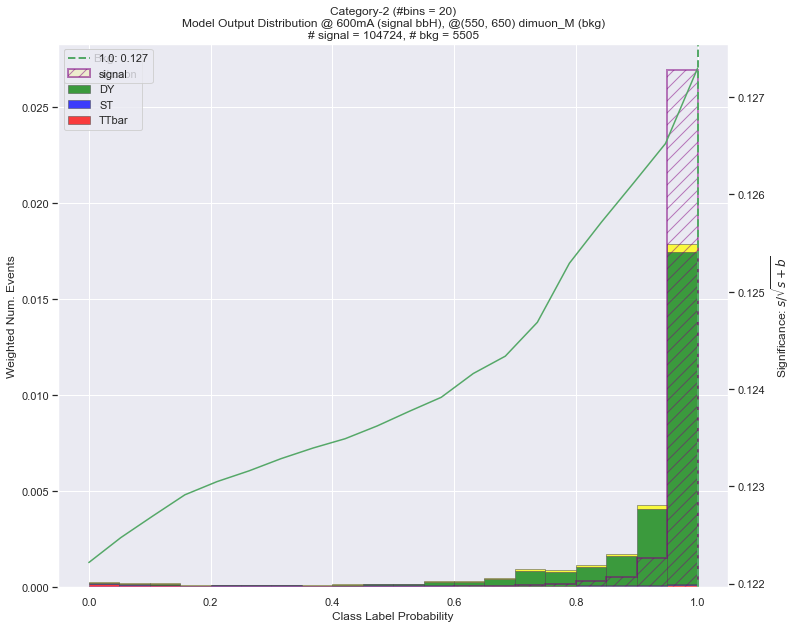

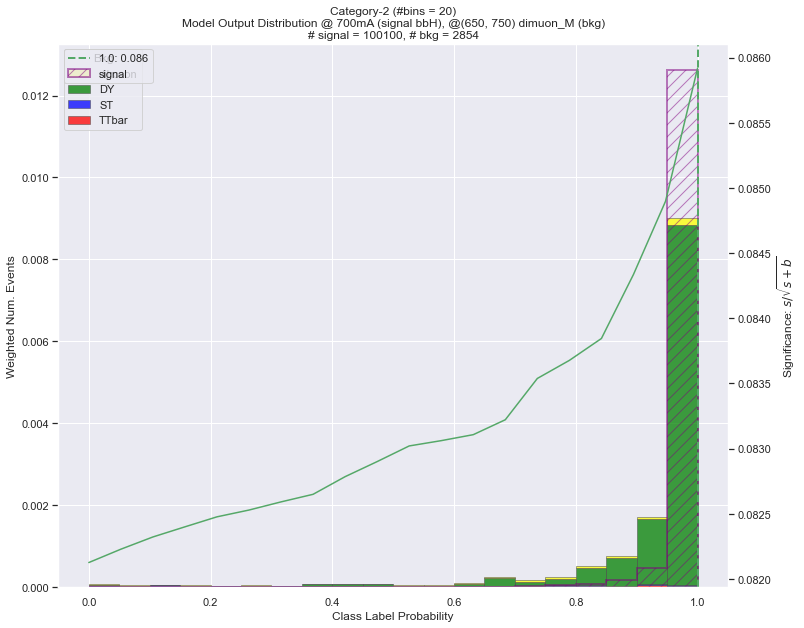

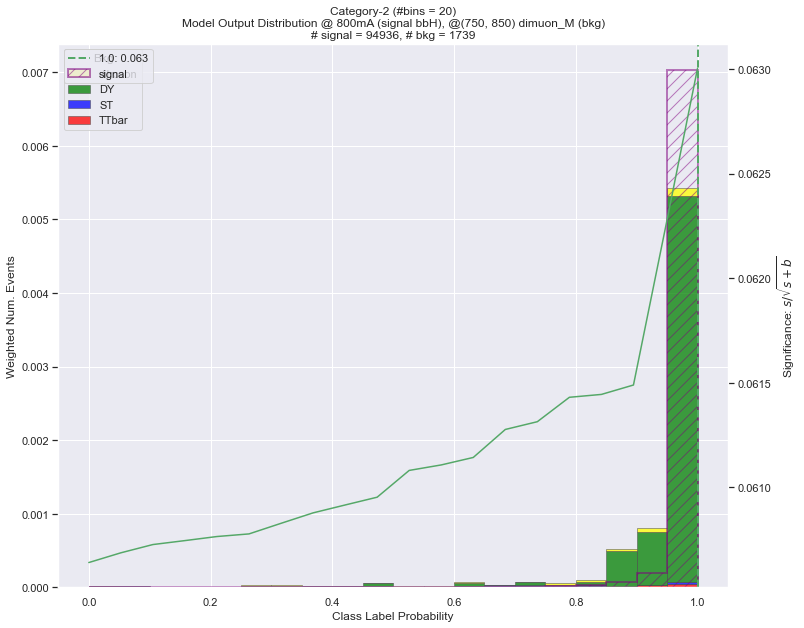

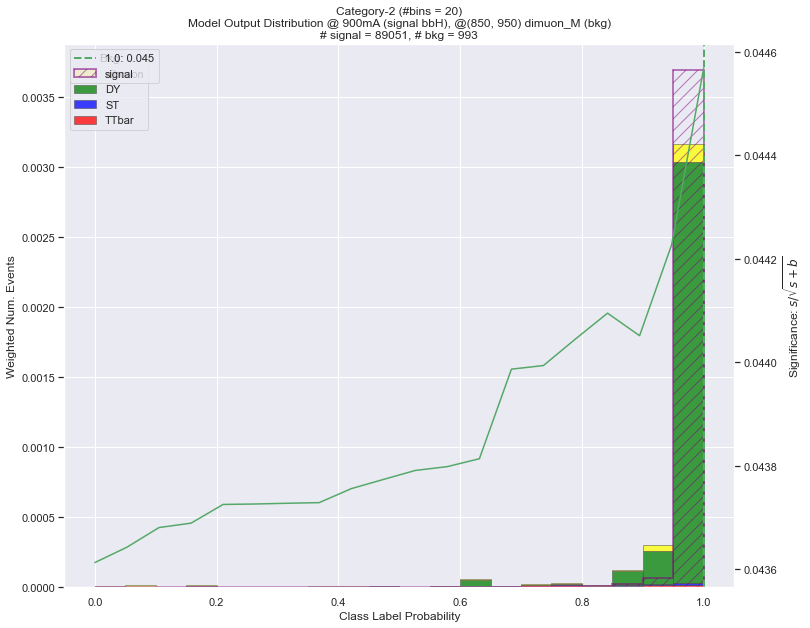

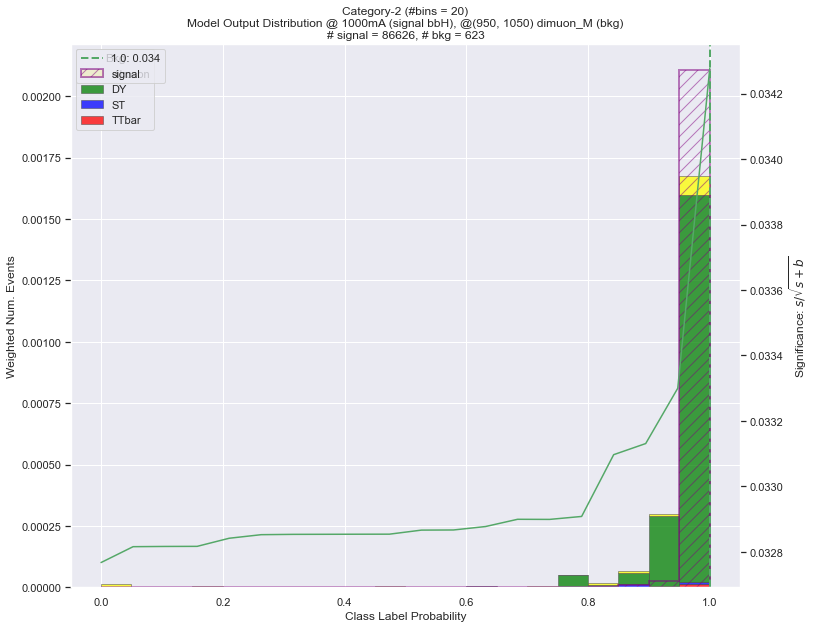

In [9]:
for mass in data.unique_signal_mass:
    cms.plot.significance(model, data_cat2, mass=mass, category=2, signal='bbH',
            path='plot/pNN/inclusive/bbH/balanced/cat-2/performance', save=f'significance_{int(mass)}mA')

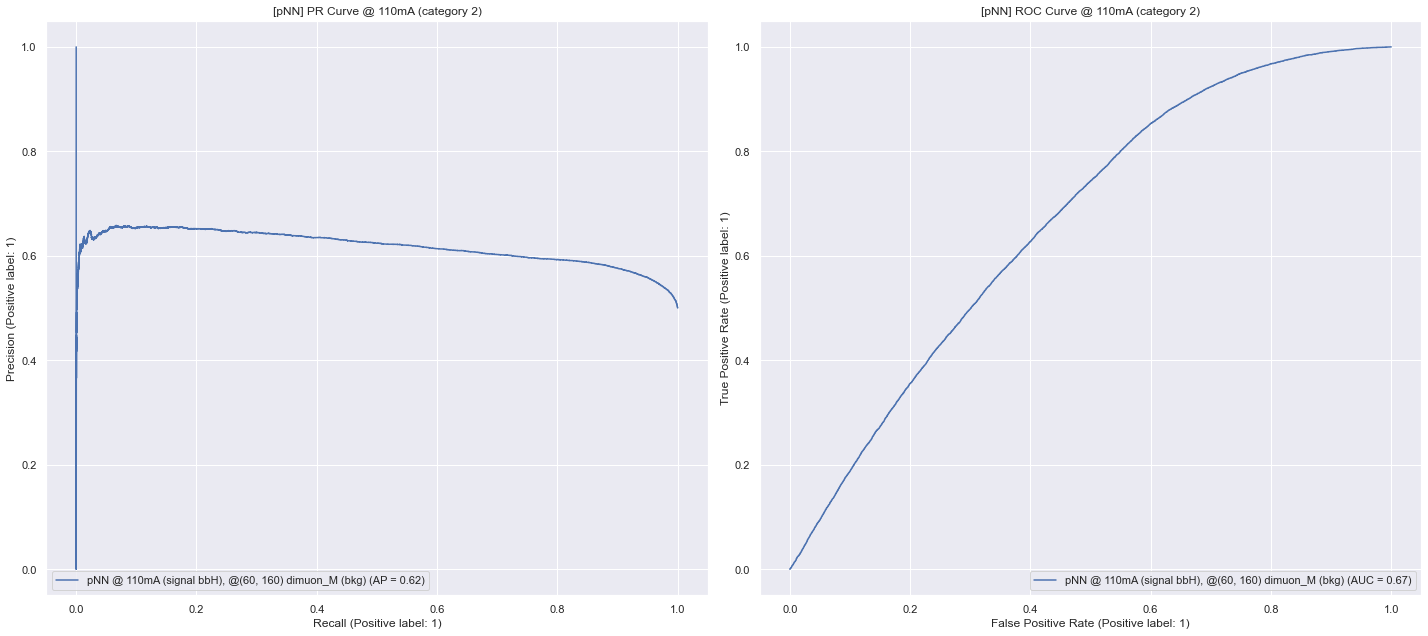

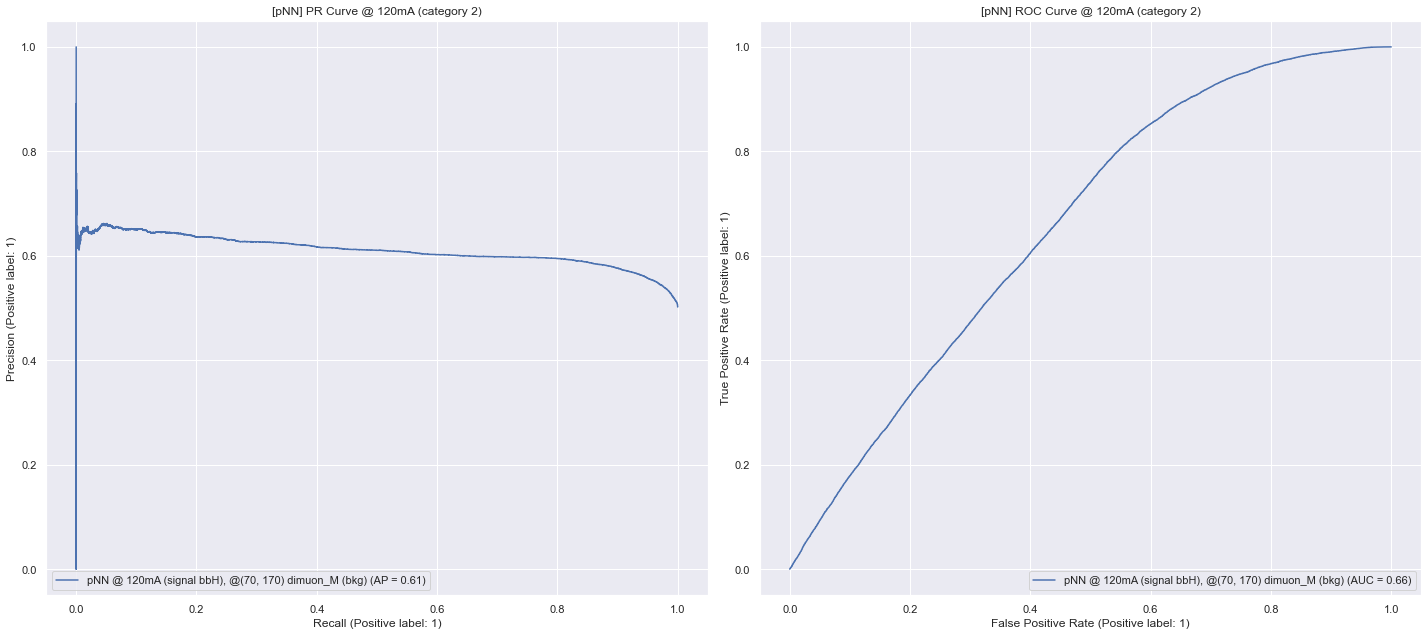

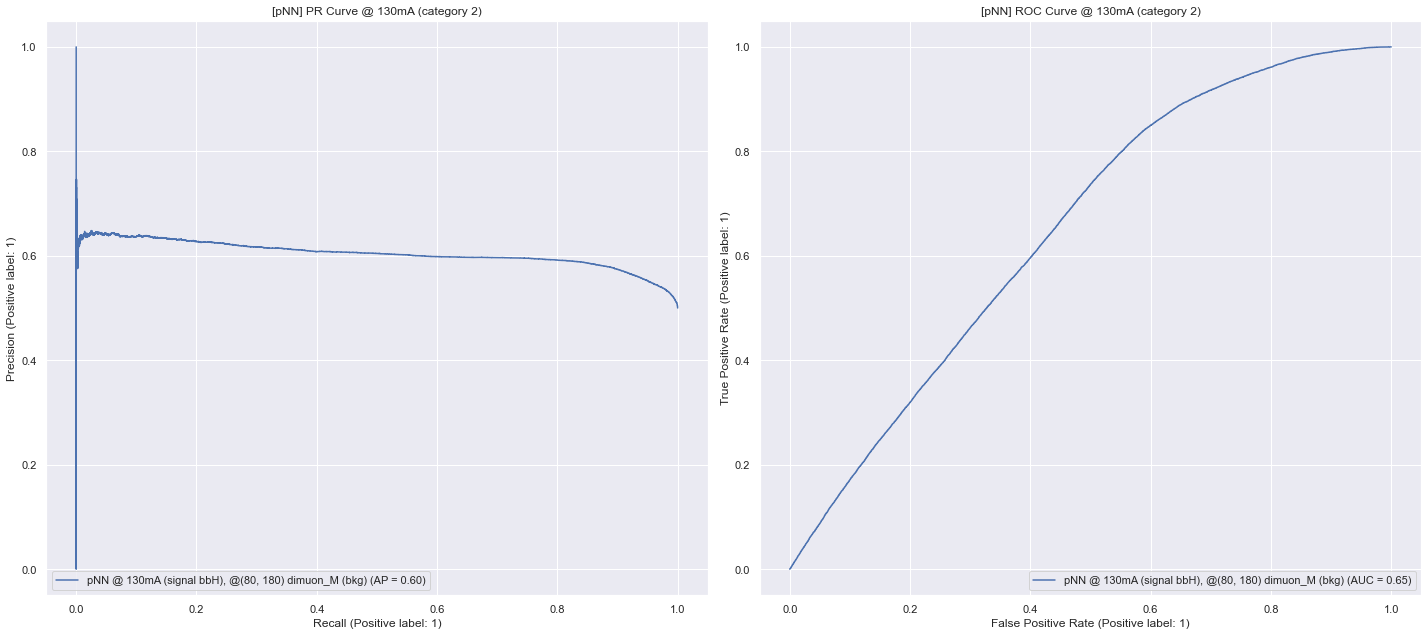

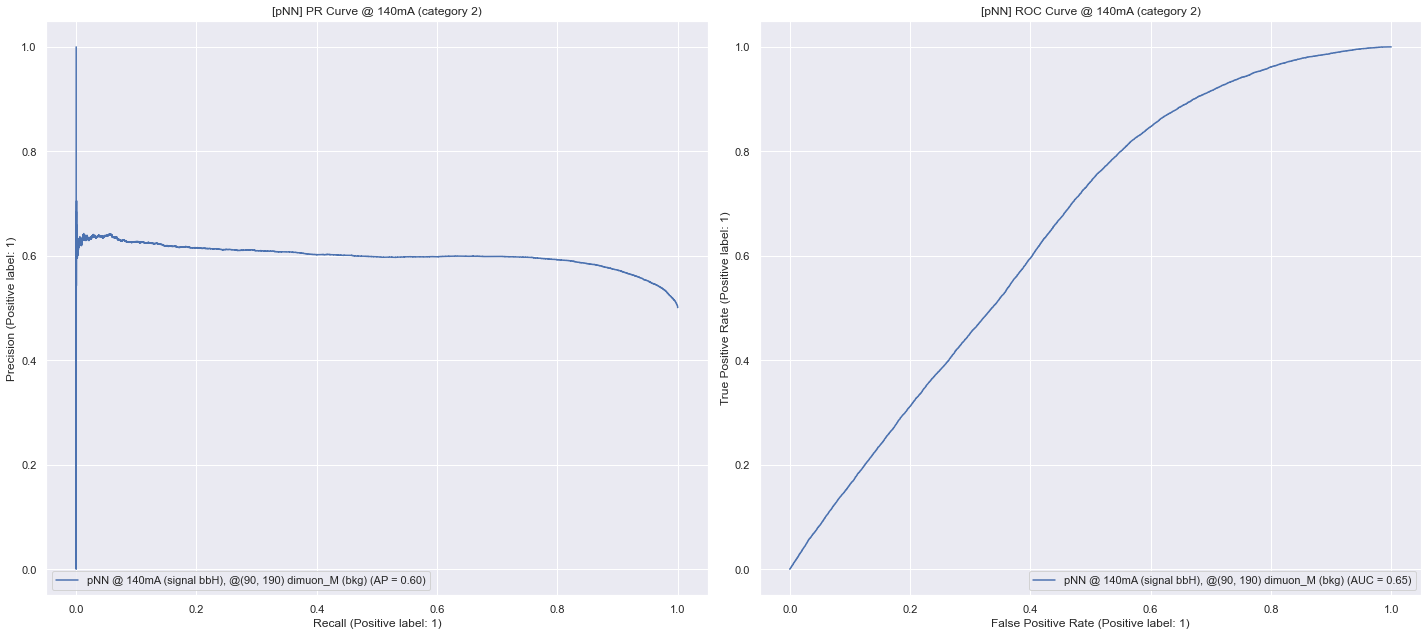

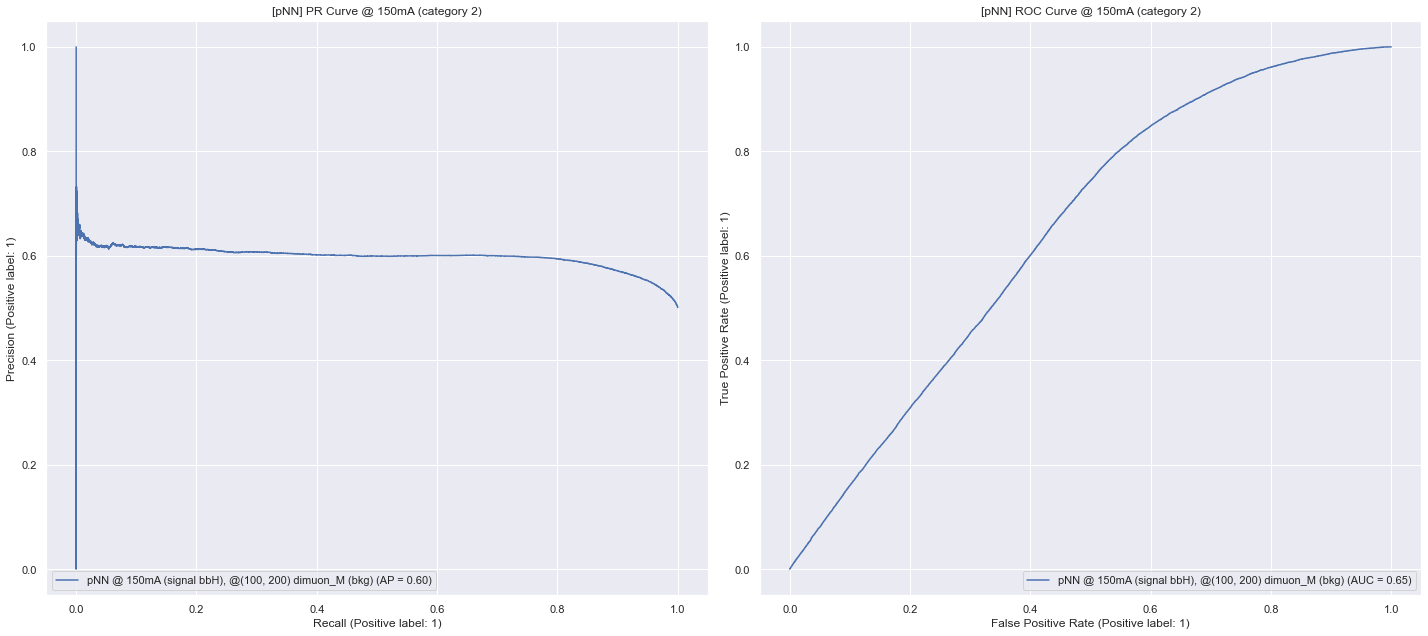

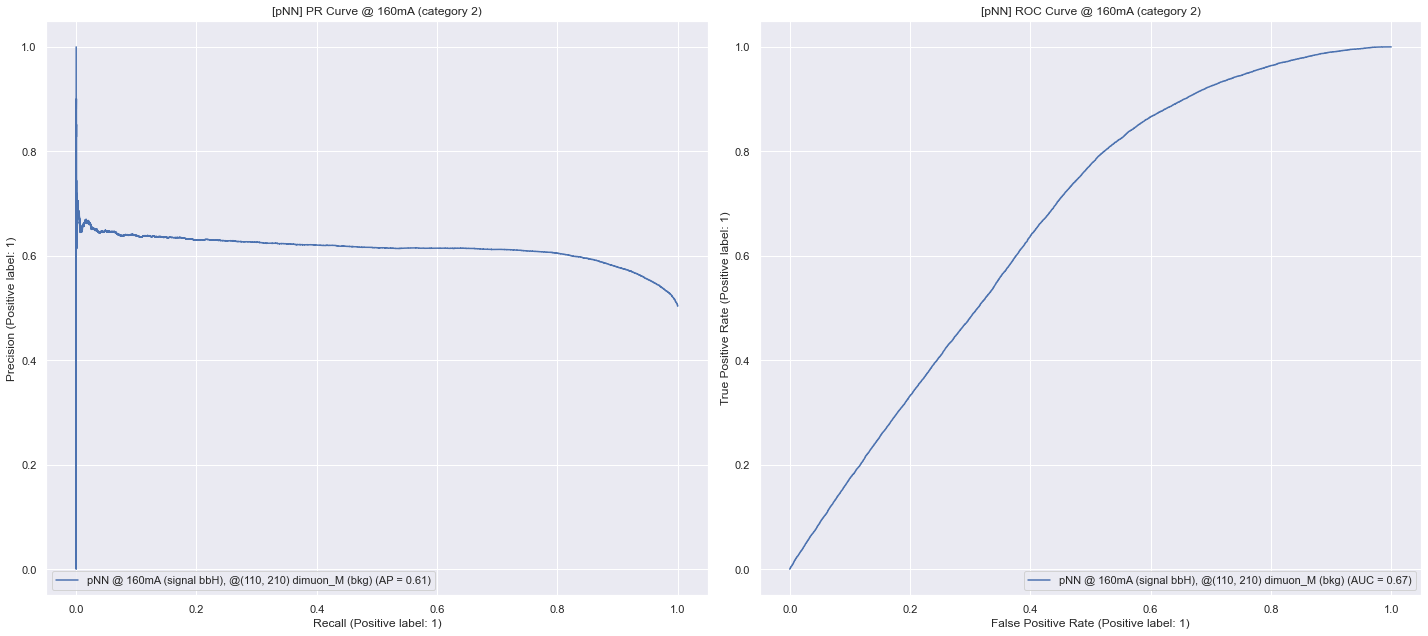

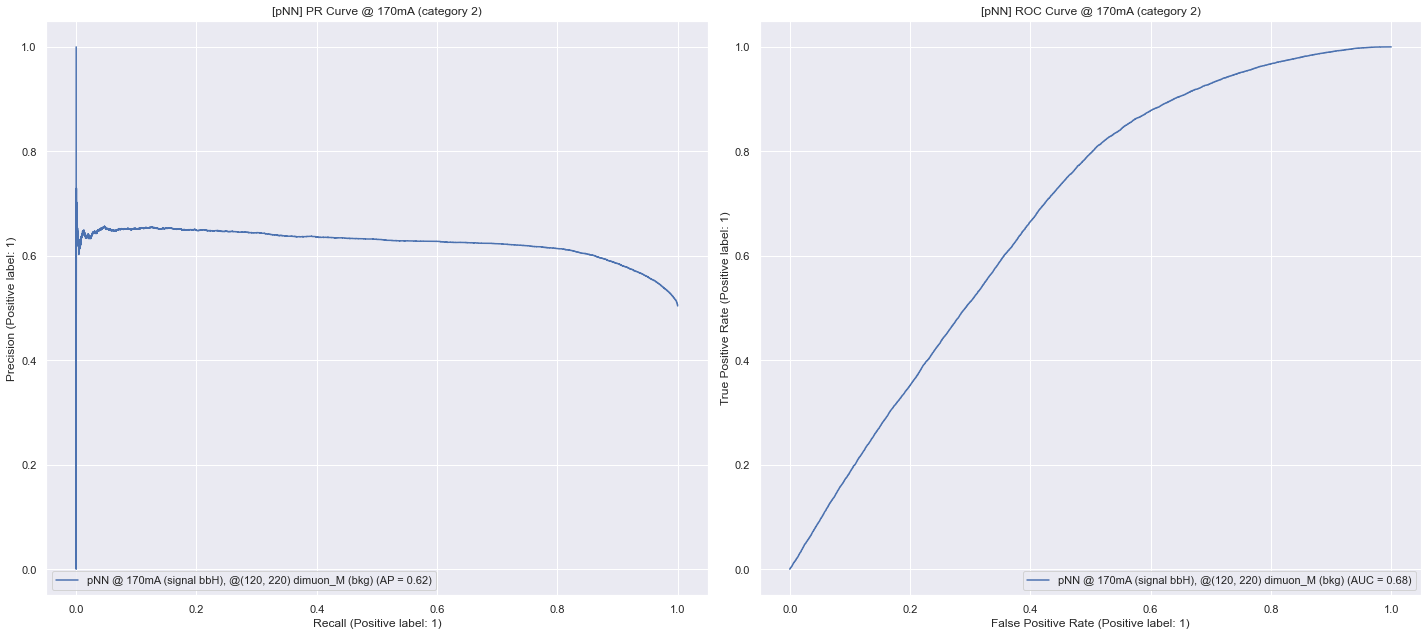

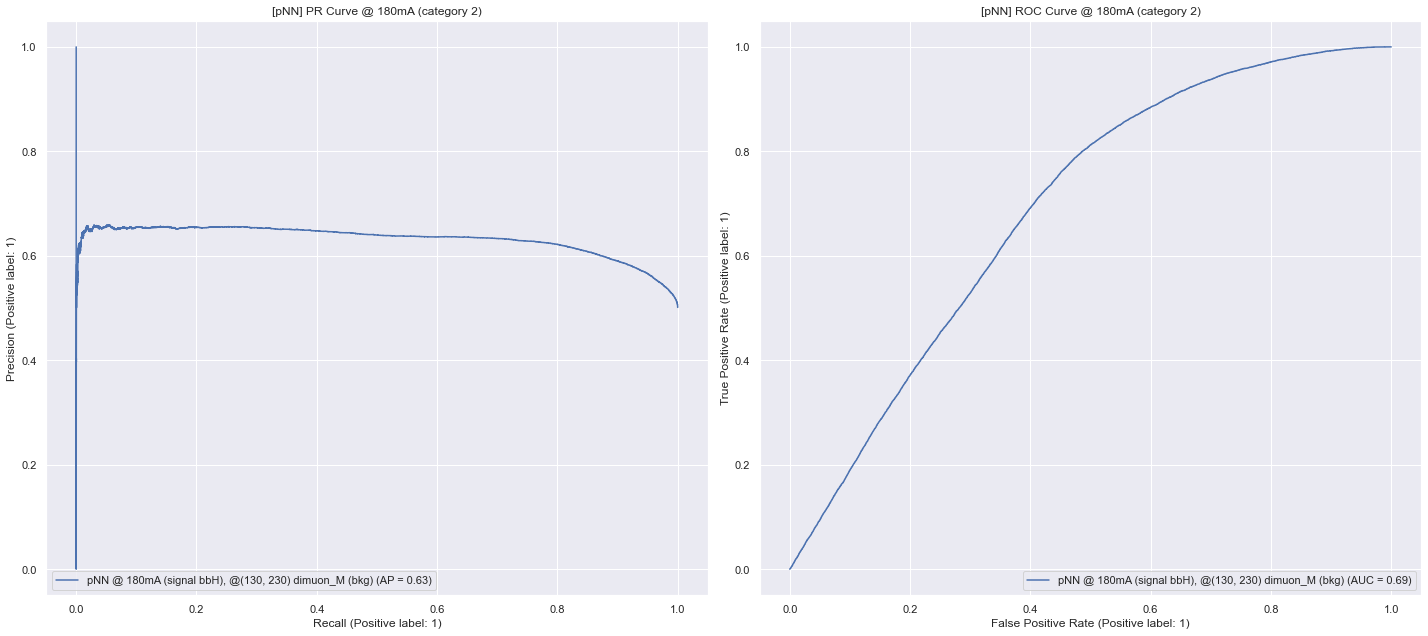

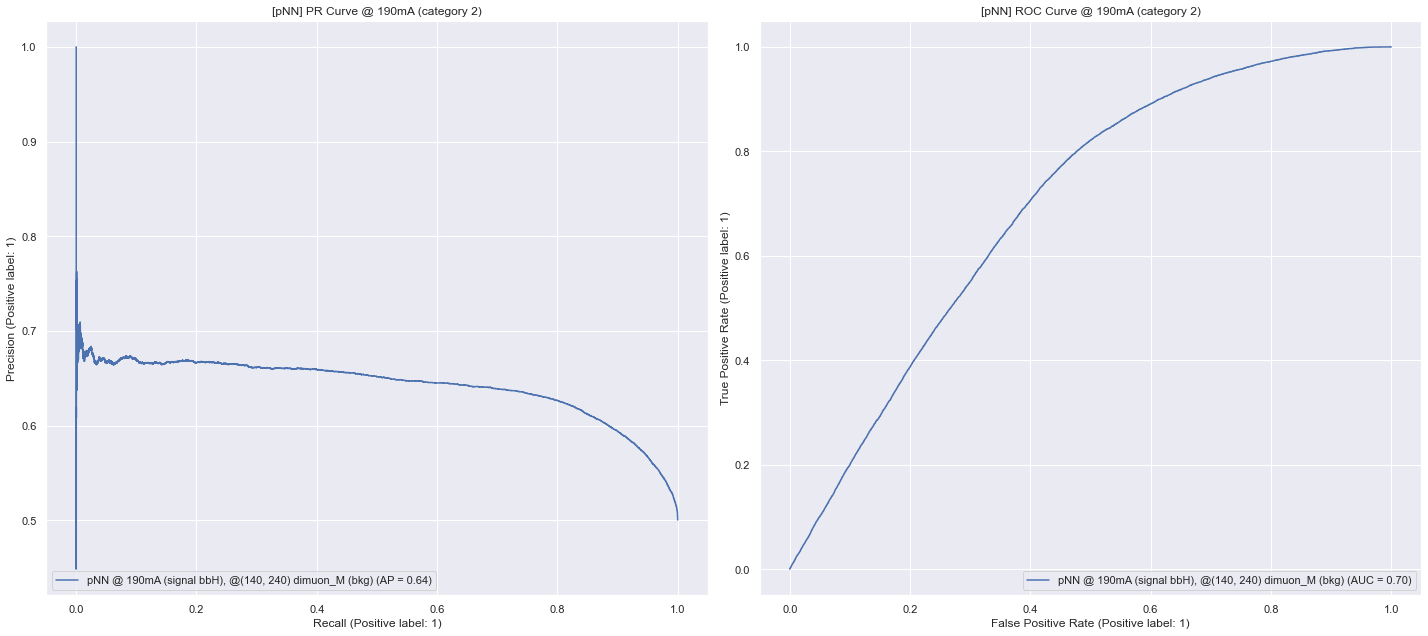

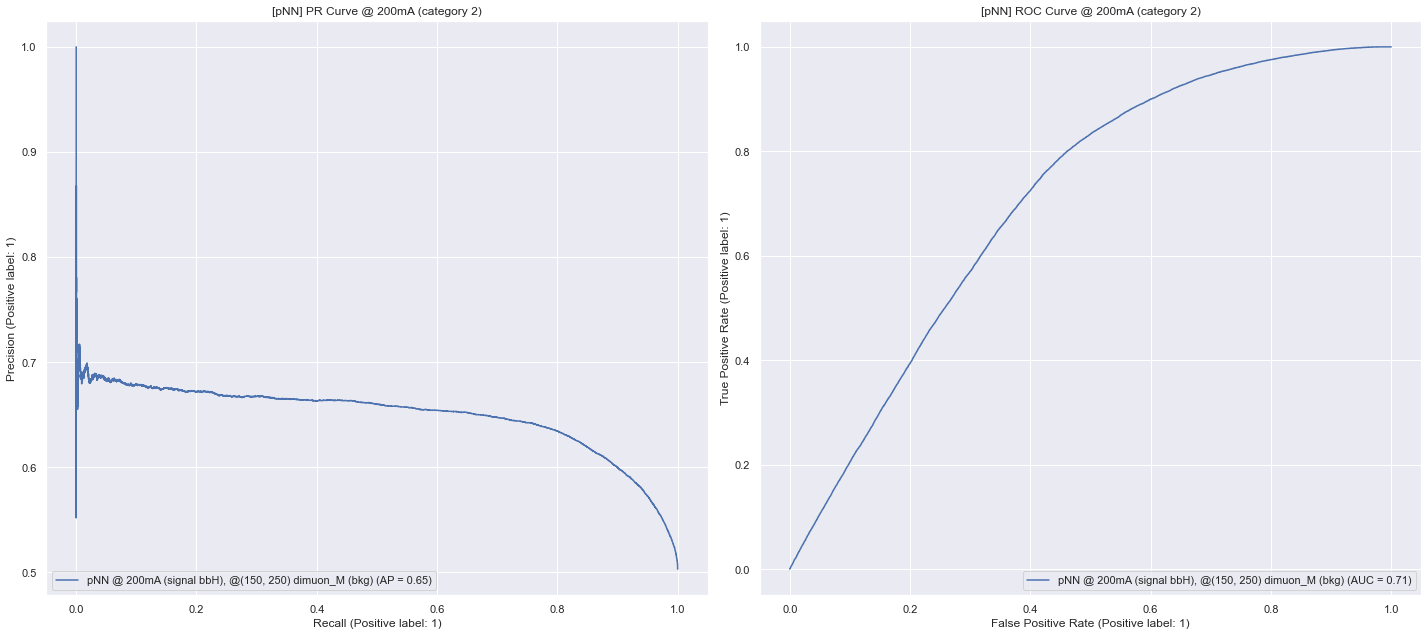

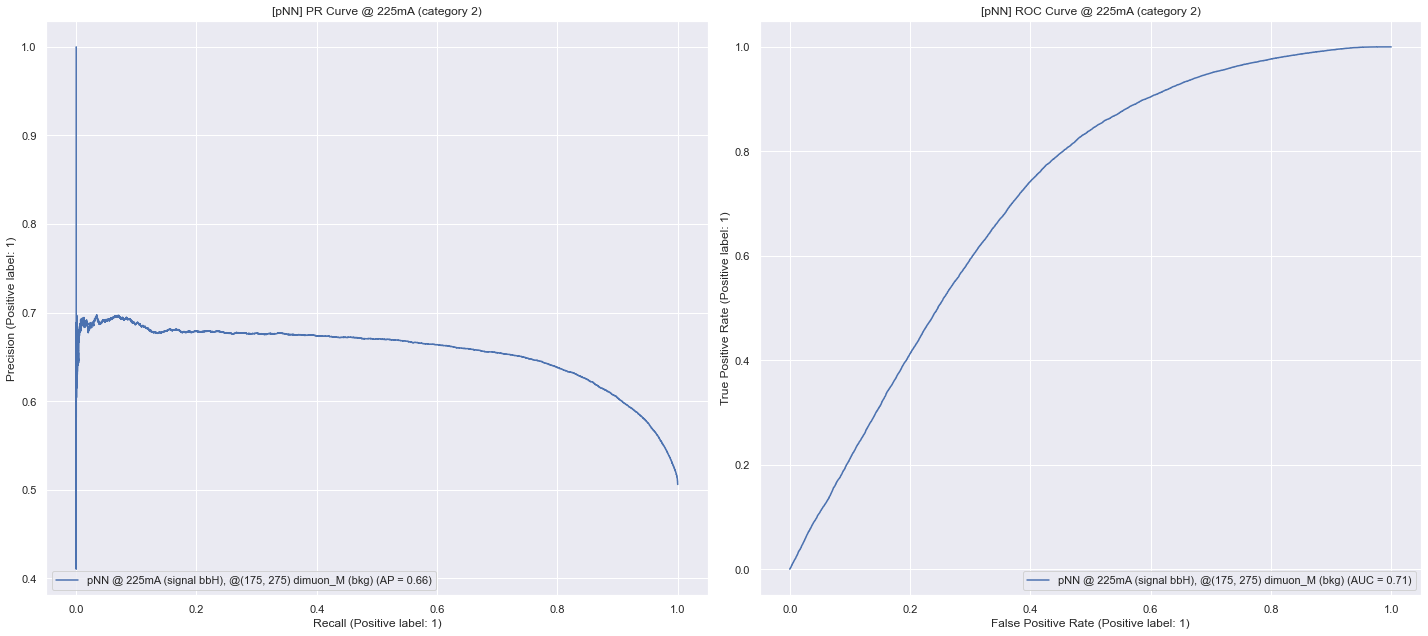

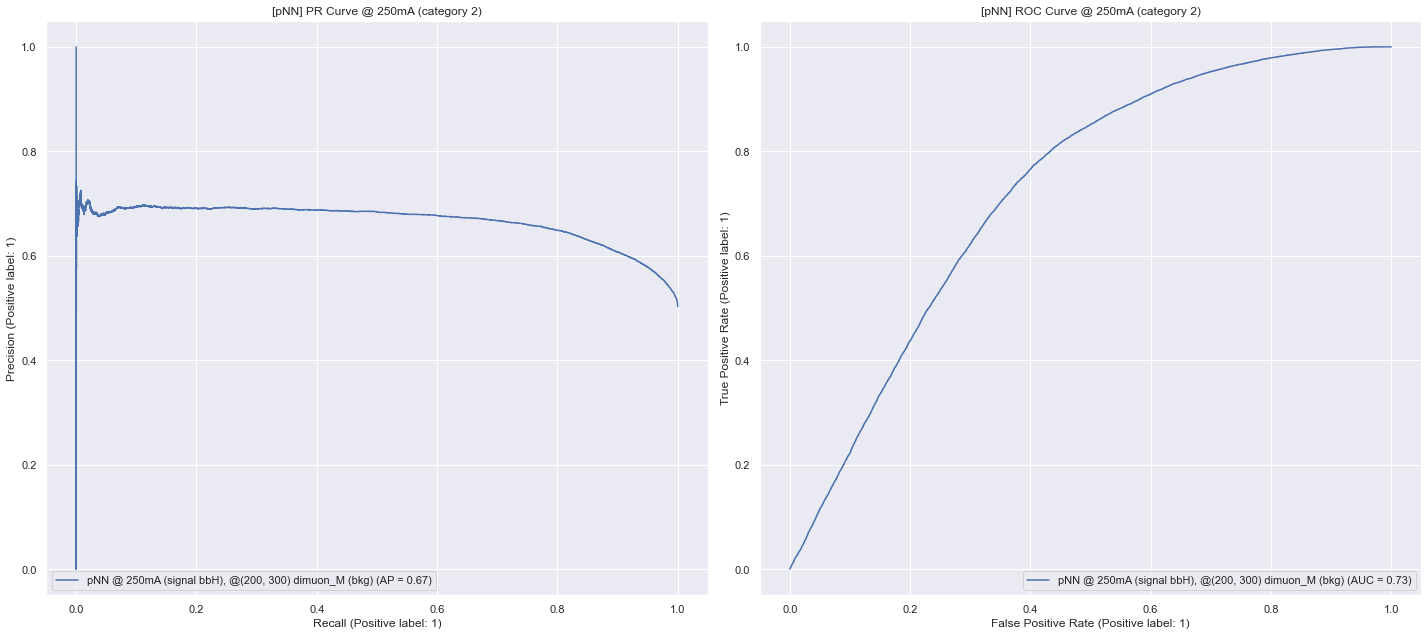

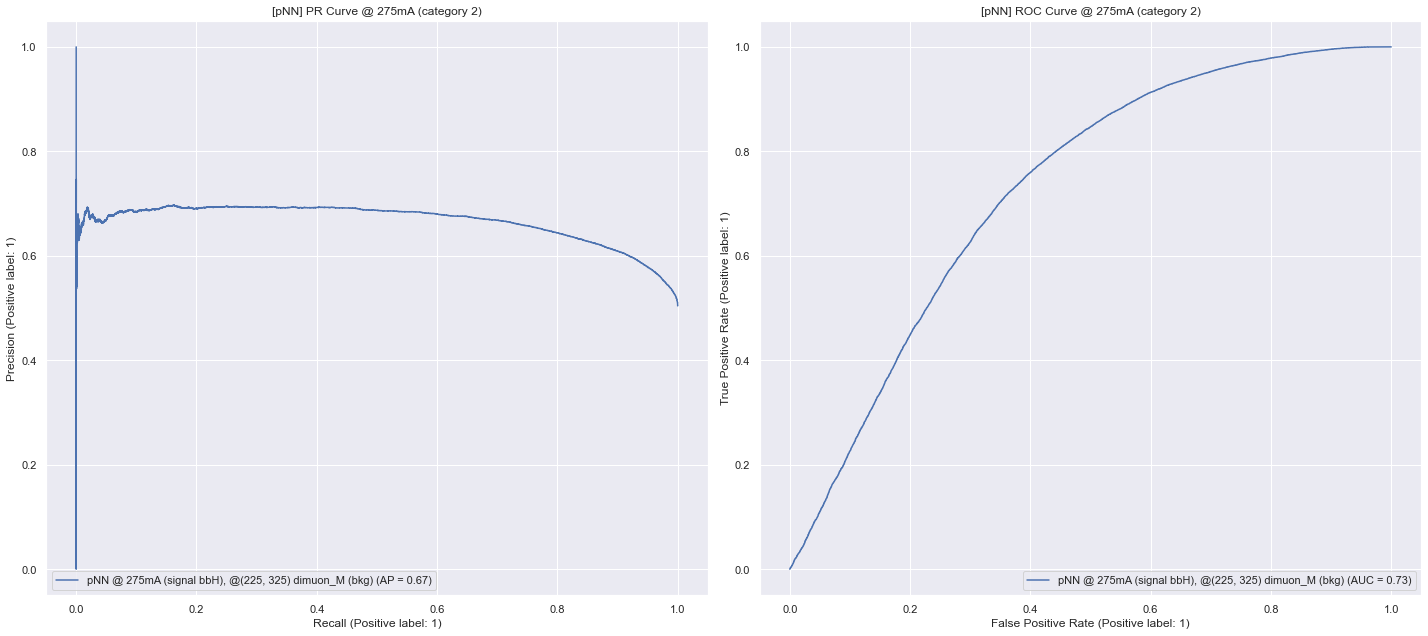

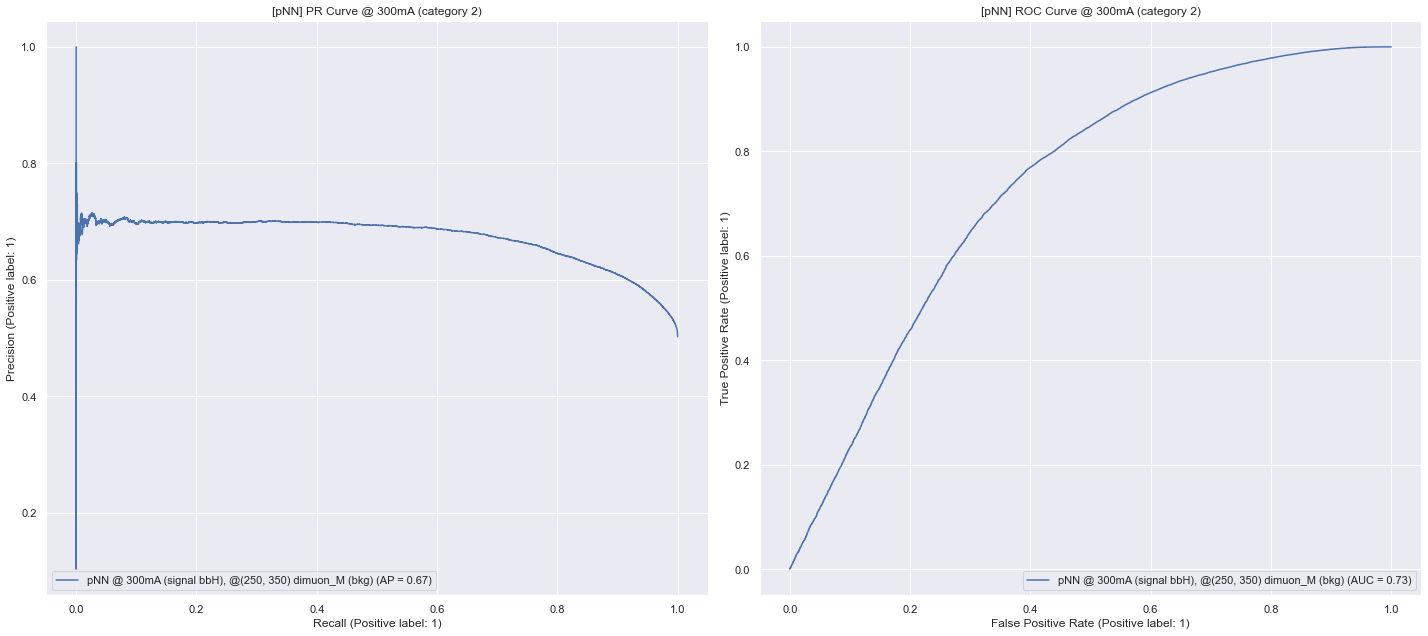

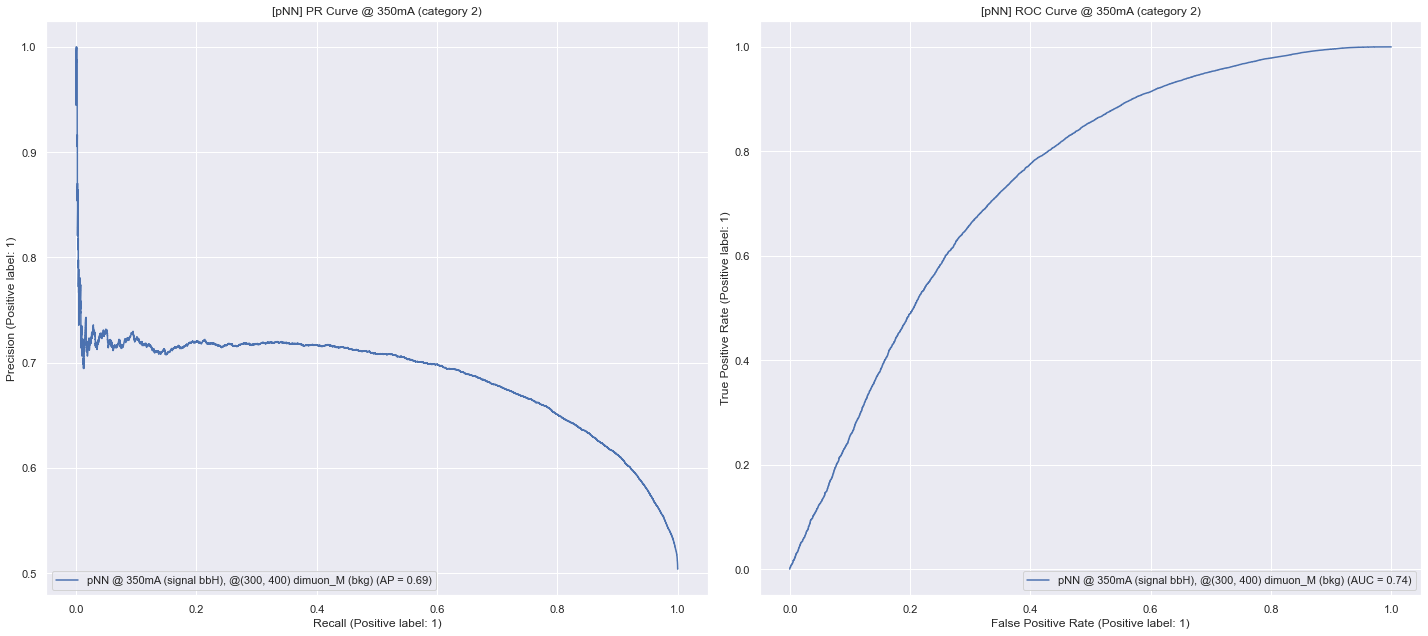

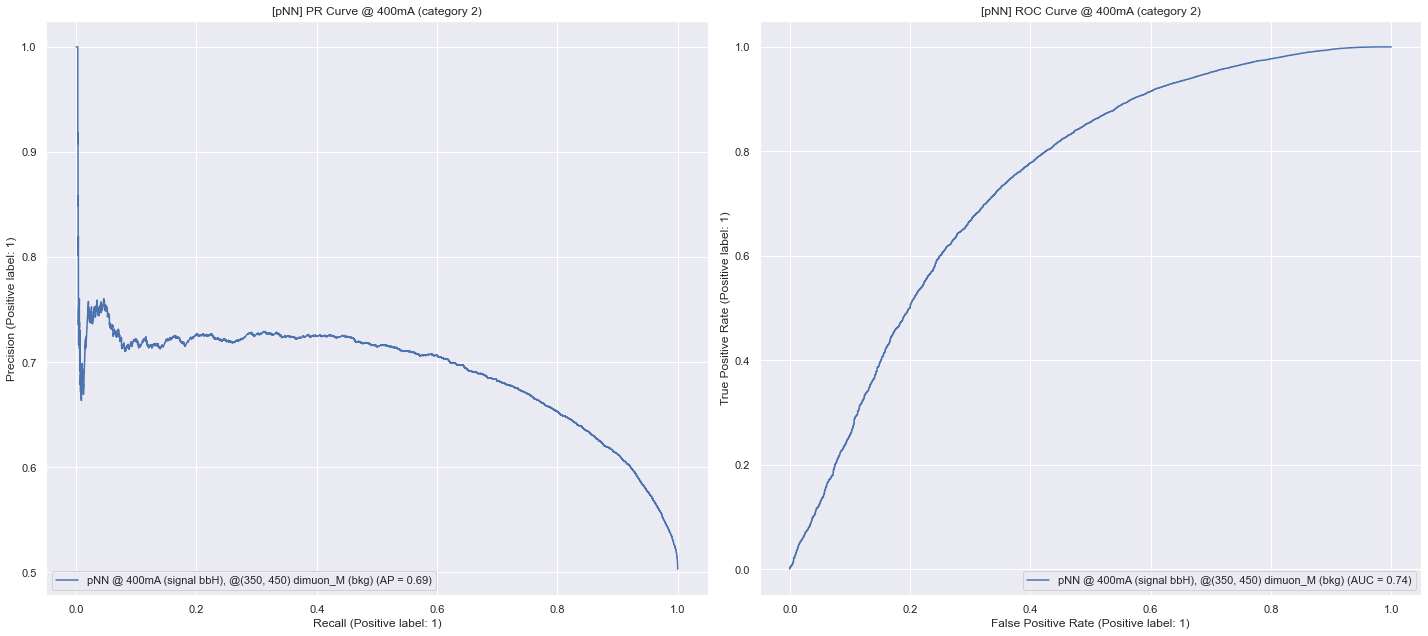

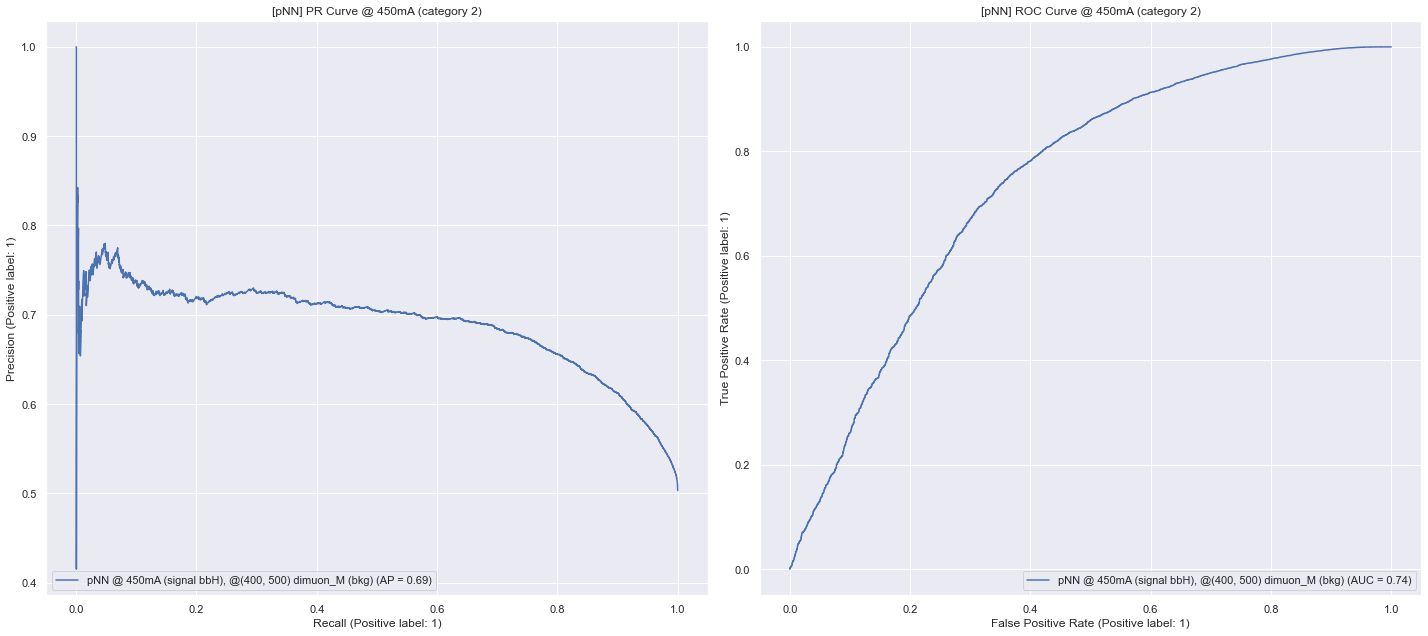

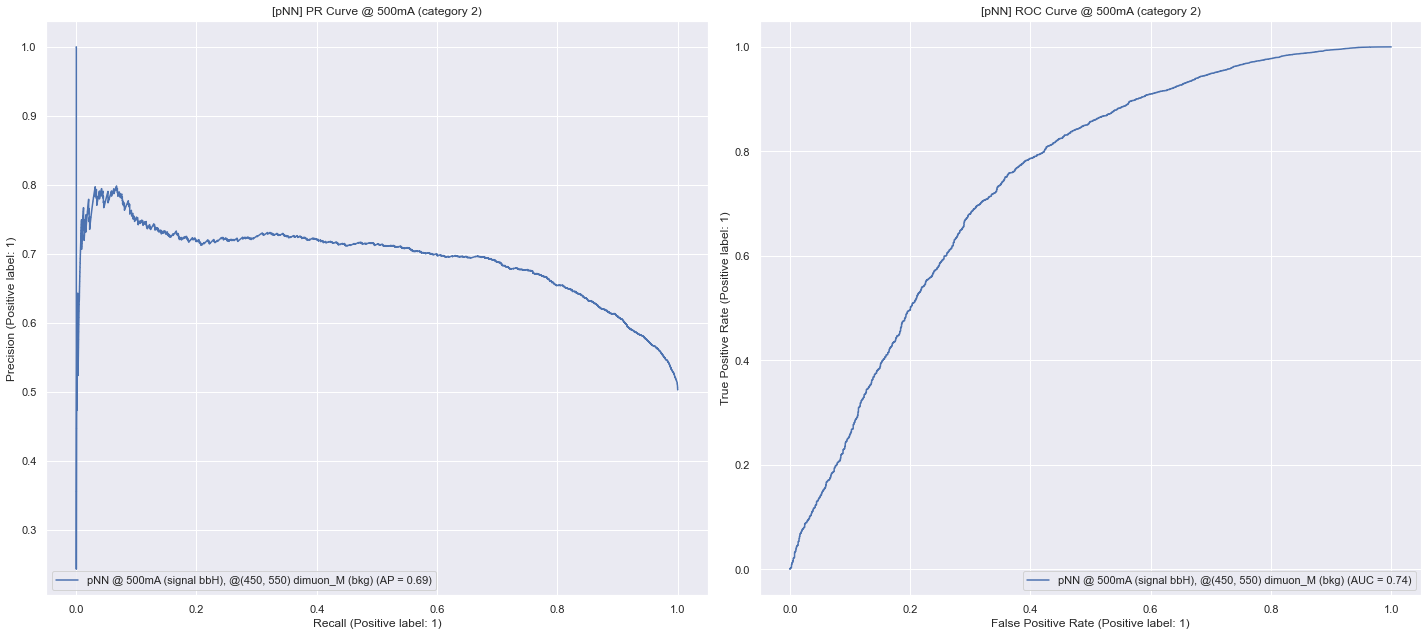

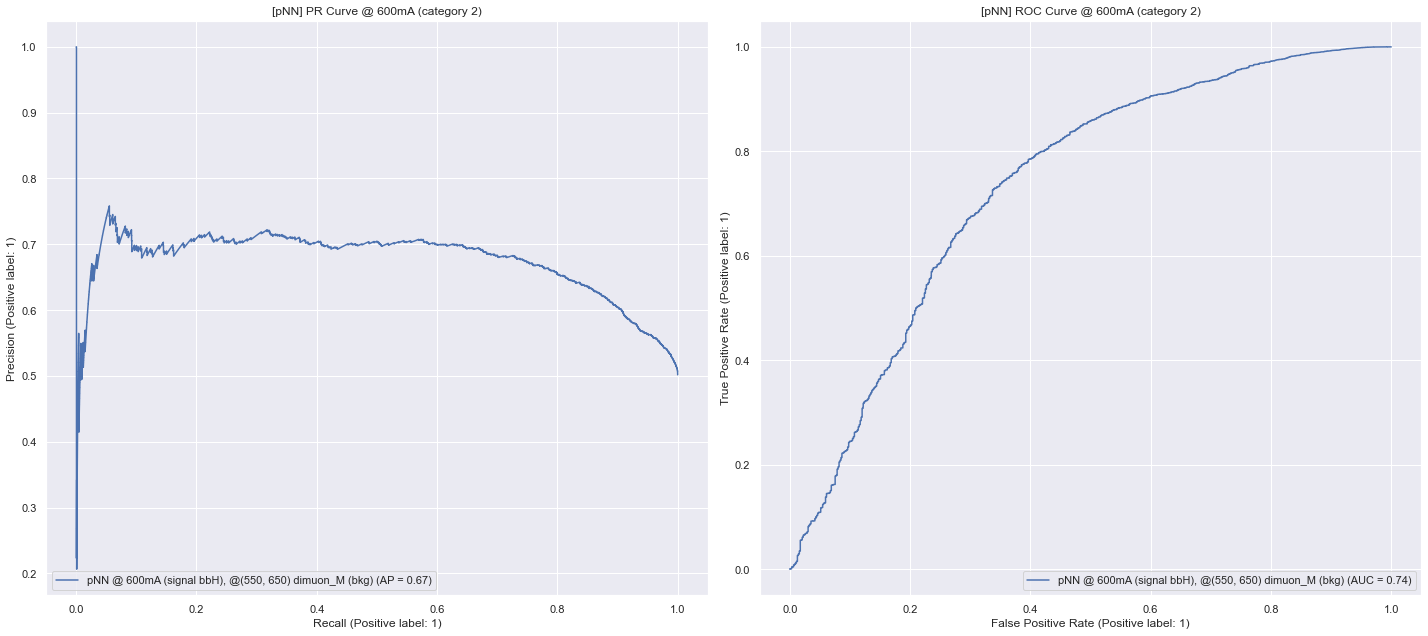

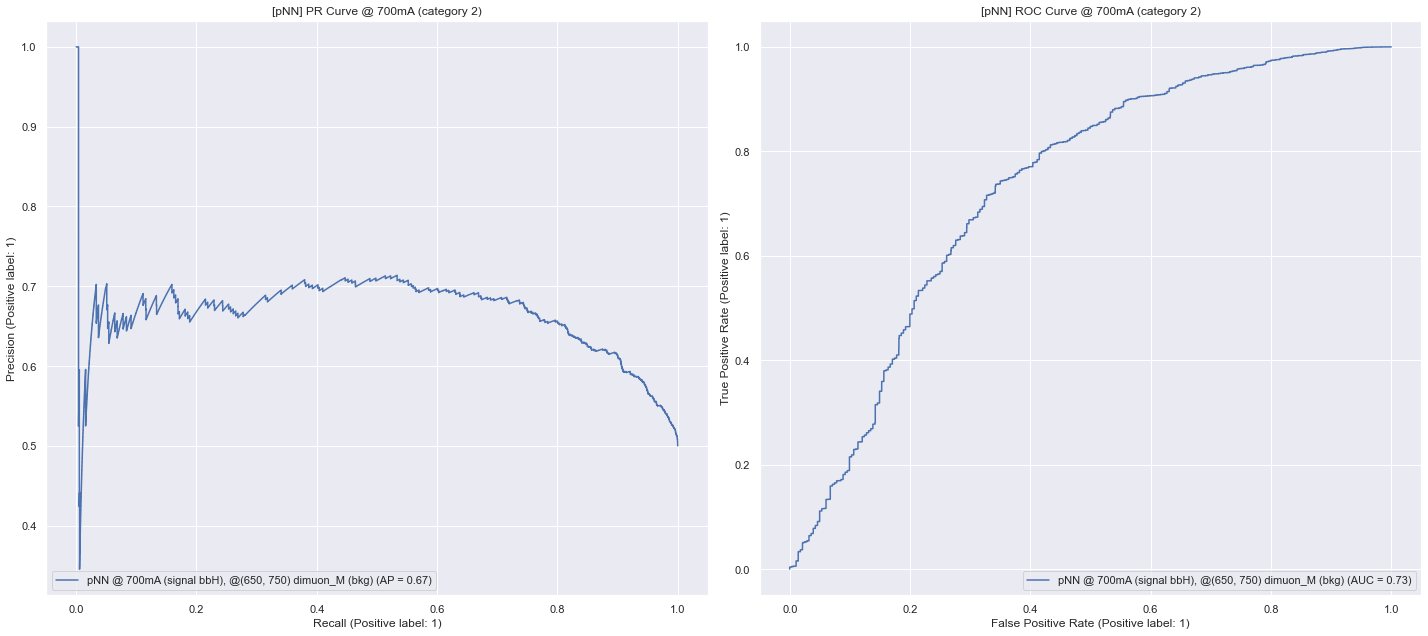

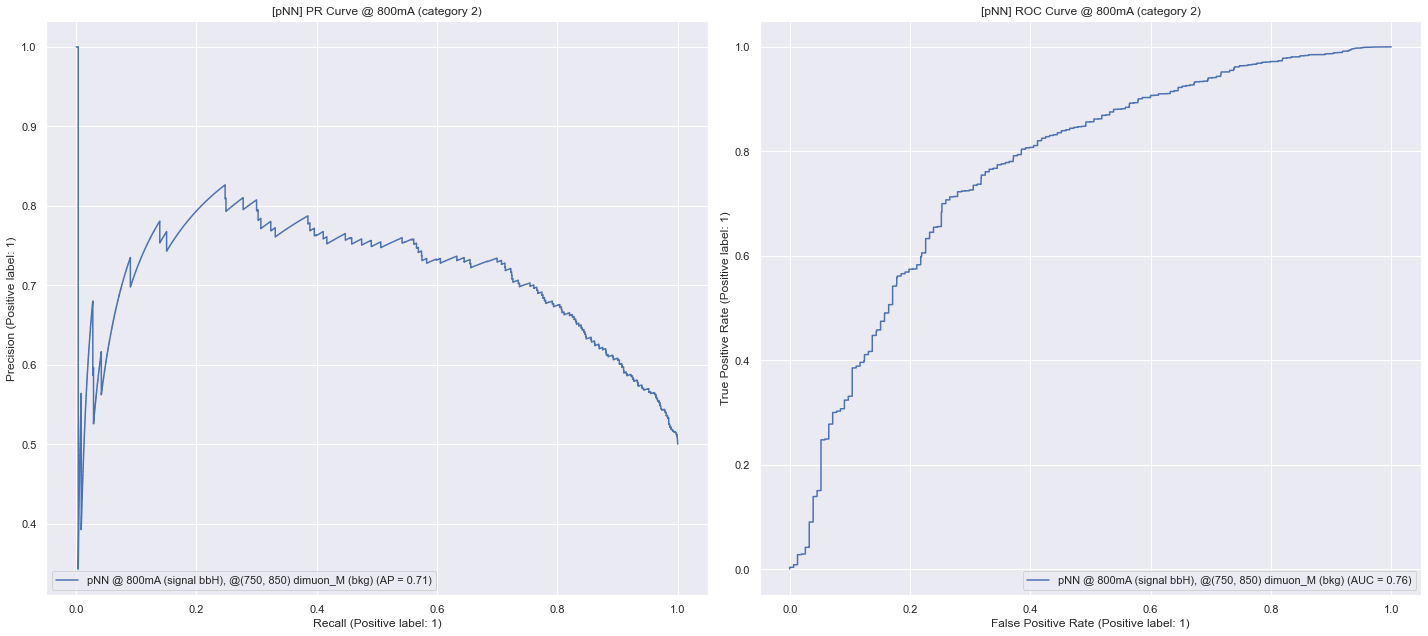

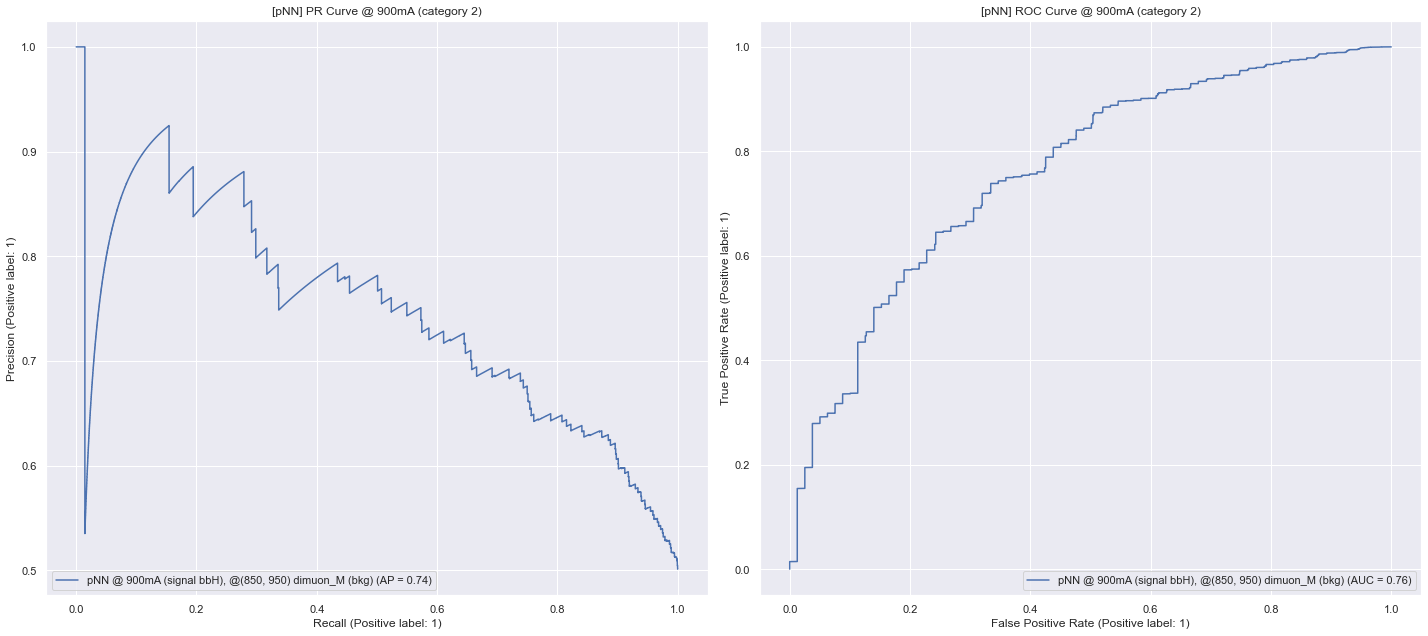

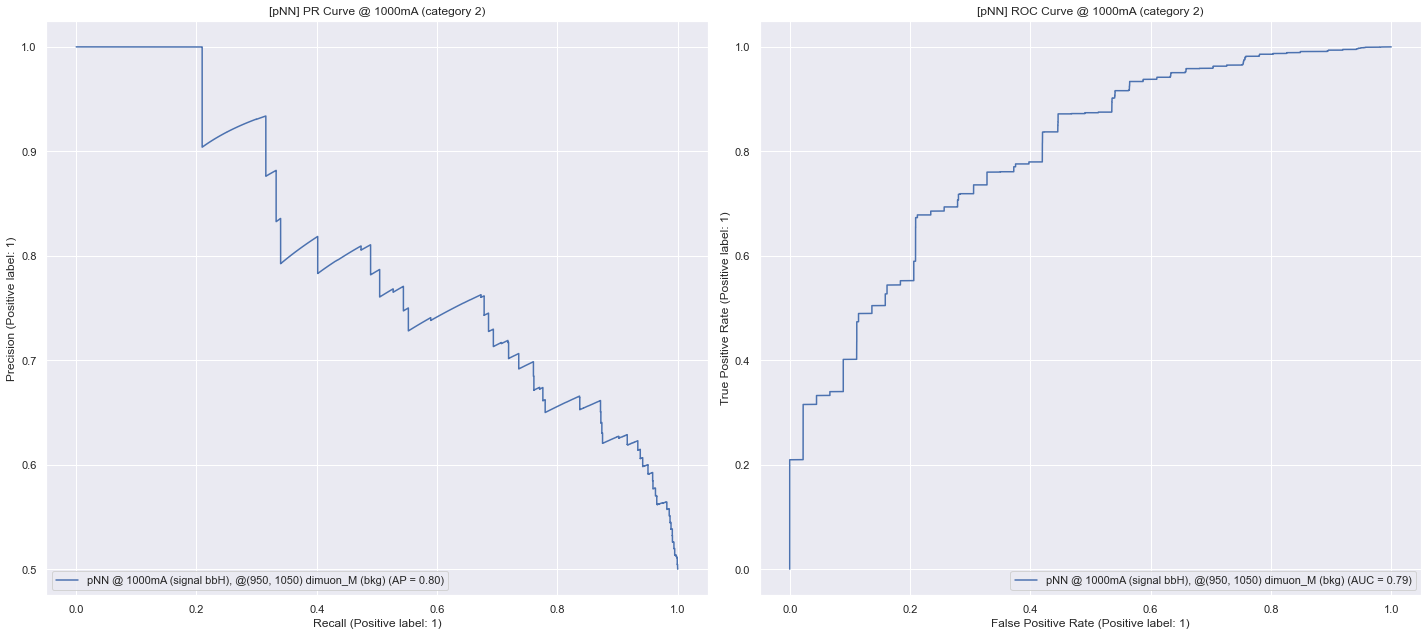

In [10]:
for mass in data.unique_signal_mass:
    cms.plot.curves(model, data_cat2, mass=mass, category=2, signal='bbH',
                    path='plot/pNN/inclusive/bbH/balanced/cat-2/performance', save=f'curves_{int(mass)}mA')

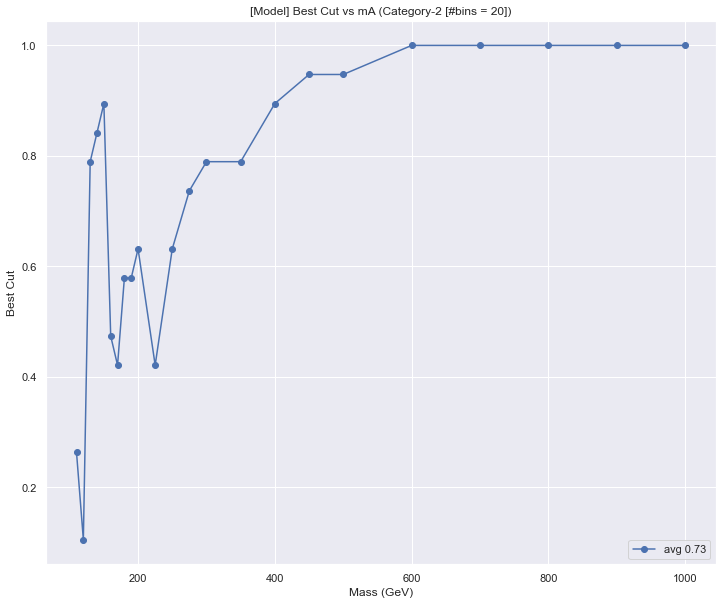

In [11]:
_ = cms.plot.cut(model, data_cat2, category=2, signal='bbH', legend='lower right',
                 path='plot/pNN/inclusive/bbH/balaned/cat-2/performance', save='best-cut_vs_mA')